In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1 style="color: #1f77b4;">🎬 VEATIC Dataset: Video-based Emotion and Affect Tracking in Context</h1>

---

<h2 style="color: #ff7f0e;">📊 Dataset Overview</h2>
The <strong>VEATIC</strong> dataset is designed to analyze emotions and affect in video content with <strong>contextual awareness</strong>. Key points:

- 🎥 <strong>Source</strong>: 124 video clips from Hollywood movies, documentaries, and home videos.
- 📝 <strong>Annotations</strong>: Continuous <span style="color: #2ca02c;">valence</span> and <span style="color: #d62728;">arousal</span> ratings per frame, focusing on the emotional state of the target character.
- 👁️ <strong>Focus</strong>: Captures <strong>facial expressions</strong>, <strong>body language</strong>, and <strong>scene context</strong> influencing emotional states.
- 💾 <strong>Format</strong>: Video files with frame-level annotations available for research purposes.

---

<h2 style="color: #2ca02c;">📝 What Are the Annotations?</h2>
The annotations are **numerical labels** that describe the emotional state of the target character in each frame:

- 💚 <strong>Valence</strong>: How pleasant or unpleasant the emotion is.
  - High valence → positive (e.g., happiness)
  - Low valence → negative (e.g., sadness, anger)
- 🔥 <strong>Arousal</strong>: How intense or calm the emotion is.
  - High arousal → excitement, anger, fear
  - Low arousal → calm, relaxation, boredom

<strong>Why they are important:</strong>
1. 🧠 Provide **ground truth labels** for training machine learning models.  
2. 📈 Enable **continuous emotion prediction** rather than fixed categories.  
3. 👁️ Help models learn the relationship between **body language, facial expression, and context**.  
4. 📊 Allow **quantitative evaluation** of models using metrics like MAE, CCC, or correlation.  
5. 🎨 Enable **visualization of emotional dynamics** over time for deeper insights.

Example of emotional trajectory:

| Time (s) | Valence | Arousal | Description |
|-----------|----------|---------|-------------|
| 0–5       | +0.6     | 0.2     | Calm, neutral mood |
| 6–15      | +0.3     | 0.5     | Tension rising |
| 16–25     | −0.4     | 0.8     | Anger or frustration |
| 26–30     | −0.2     | 0.6     | Still negative, calming down |

---

<h2 style="color: #d62728;">🎯 Project Objective</h2>
The main goals of this project are:

1. 🧠 **Analyze emotions and body language** of characters in videos using the VEATIC dataset.
2. 🔍 **Extract visual features** such as facial expressions, body movements, and contextual cues.
3. 🤖 **Model emotional states** using machine learning or deep learning techniques.
4. 📈 **Predict continuous affect** (valence and arousal) for each frame.
5. 💡 **Provide insights** into how context and body language contribute to emotional expression for applications in:
   - Affective computing
   - Human-computer interaction
   - Behavioral analysis

---

<h2 style="color: #9467bd;">🛠️ Usage</h2>
This dataset is particularly suited for:

- 🖼️ **Emotion recognition** considering **body language** and **contextual cues**.
- 📊 **Training and evaluating models** on **continuous emotion prediction** tasks.
- 💻 Integrating with computer vision pipelines using frameworks such as **OpenCV**, **PyTorch**, or **TensorFlow**.


Exploring the dataset

In [3]:
import os
import cv2
import pandas as pd
from collections import Counter

# ✅ Correct base path
base_path = "/content/drive/MyDrive/Colab Notebooks/dataVideo"

print("📂 Folders in dataVideo:")
for folder in os.listdir(base_path):
    print(" -", folder)

# === 1️⃣ Explore video files ===
video_dir = os.path.join(base_path, "videos")
if os.path.exists(video_dir):
    video_files = [f for f in os.listdir(video_dir) if f.endswith(('.mp4', '.avi', '.mov'))]
    print(f"\n🎥 Total videos found: {len(video_files)}")
    print("📜 Sample video files:", video_files[:5])

    # Display video properties
    print("\n🎞️ Video details:")
    for vf in video_files[:3]:  # analyze first 3 videos
        path = os.path.join(video_dir, vf)
        cap = cv2.VideoCapture(path)
        if not cap.isOpened():
            print(f"❌ Could not open {vf}")
            continue

        fps = cap.get(cv2.CAP_PROP_FPS)
        frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        duration = frames / fps if fps > 0 else 0
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        print(f" - {vf}: {width}x{height}, {fps:.1f} FPS, {frames} frames, {duration:.2f} sec")
        cap.release()

# === 2️⃣ Explore rating files ===
rating_dir = os.path.join(base_path, "rating_averaged")
if os.path.exists(rating_dir):
    rating_files = [f for f in os.listdir(rating_dir) if f.endswith(('.csv', '.json', '.txt'))]
    print(f"\n📝 Rating files found: {len(rating_files)}")
    print("📄 Sample annotation files:", rating_files[:5])

    # Try loading a sample CSV file
    sample_file = None
    for f in rating_files:
        if f.endswith(".csv"):
            sample_file = os.path.join(rating_dir, f)
            break

    if sample_file:
        print(f"\n🔍 Previewing annotations from: {os.path.basename(sample_file)}")
        df = pd.read_csv(sample_file)
        print("📑 Columns:", df.columns.tolist())
        print(df.head())

        # Basic summary
        if 'valence' in df.columns and 'arousal' in df.columns:
            print("\n📈 Annotation summary:")
            print(f"Valence range: {df['valence'].min():.2f} → {df['valence'].max():.2f}")
            print(f"Arousal range: {df['arousal'].min():.2f} → {df['arousal'].max():.2f}")
            print(f"Missing values: {df.isna().sum().to_dict()}")
        else:
            print("⚠️ Columns 'valence' and 'arousal' not found — check file structure.")

# === 3️⃣ Dataset overview ===
print("\n✅ Dataset summary:")
print(f"Videos folder: {video_dir}")
print(f"Ratings folder: {rating_dir}")
print(f"Number of videos: {len(video_files)}")
print(f"Number of rating files: {len(rating_files)}")


📂 Folders in dataVideo:
 - rating_averaged
 - videos
 - features_csv
 - emotion_pose_dataset.csv
 - emotion_pose_dataset.gsheet

🎥 Total videos found: 124
📜 Sample video files: ['52.mp4', '20.mp4', '54.mp4', '19.mp4', '8.mp4']

🎞️ Video details:
 - 52.mp4: 854x480, 25.0 FPS, 264 frames, 10.56 sec
 - 20.mp4: 854x460, 25.0 FPS, 453 frames, 18.12 sec
 - 54.mp4: 854x480, 25.0 FPS, 864 frames, 34.56 sec

📝 Rating files found: 248
📄 Sample annotation files: ['118_valence.csv', '115_arousal.csv', '102_valence.csv', '114_arousal.csv', '100_arousal.csv']

🔍 Previewing annotations from: 118_valence.csv
📑 Columns: ['0', '-0.03124999999999988']
   0  -0.03124999999999988
0  1             -0.063655
1  2             -0.045956
2  3             -0.019395
3  4             -0.015738
4  5             -0.031466
⚠️ Columns 'valence' and 'arousal' not found — check file structure.

✅ Dataset summary:
Videos folder: /content/drive/MyDrive/Colab Notebooks/dataVideo/videos
Ratings folder: /content/drive/MyDriv

Align Videos with Emotion Ratings

In [3]:
import re

# Debug version to see the matching process
print("=== DEBUG MATCHING ===")
print(f"Video files: {video_files[:5]}...")
print(f"Rating files: {rating_files[:5]}...")

matches = []
for vid in video_files:
    vid_id = re.findall(r'\d+', vid)[0]
    print(f"\nLooking for match for video: {vid} (ID: {vid_id})")

    potential_matches = []
    for rate in rating_files:
        rate_id = re.findall(r'\d+', rate)[0]
        if vid_id in rate:
            potential_matches.append(rate)
            print(f"  Potential match: {rate} (contains {vid_id})")

    # Choose the best match (exact ID match)
    best_match = None
    for rate in potential_matches:
        rate_id = re.findall(r'\d+', rate)[0]
        if rate_id == vid_id:  # Exact match
            best_match = rate
            break

    if best_match:
        matches.append((vid, best_match))
        print(f"✅ Matched: {vid} -> {best_match}")
    elif potential_matches:
        # Fallback to first partial match (with warning)
        matches.append((vid, potential_matches[0]))
        print(f"⚠️ Using partial match: {vid} -> {potential_matches[0]}")
    else:
        print(f"❌ No match found for {vid}")

print(f"\n✅ Final matched {len(matches)} video-rating pairs.")
print("📦 Sample matches:", matches[:5])

=== DEBUG MATCHING ===
Video files: ['52.mp4', '20.mp4', '54.mp4', '19.mp4', '8.mp4']...
Rating files: ['118_valence.csv', '115_arousal.csv', '102_valence.csv', '114_arousal.csv', '100_arousal.csv']...

Looking for match for video: 52.mp4 (ID: 52)
  Potential match: 52_arousal.csv (contains 52)
  Potential match: 52_valence.csv (contains 52)
✅ Matched: 52.mp4 -> 52_arousal.csv

Looking for match for video: 20.mp4 (ID: 20)
  Potential match: 120_arousal.csv (contains 20)
  Potential match: 120_valence.csv (contains 20)
  Potential match: 20_valence.csv (contains 20)
  Potential match: 20_arousal.csv (contains 20)
✅ Matched: 20.mp4 -> 20_valence.csv

Looking for match for video: 54.mp4 (ID: 54)
  Potential match: 54_arousal.csv (contains 54)
  Potential match: 54_valence.csv (contains 54)
✅ Matched: 54.mp4 -> 54_arousal.csv

Looking for match for video: 19.mp4 (ID: 19)
  Potential match: 119_arousal.csv (contains 19)
  Potential match: 119_valence.csv (contains 19)
  Potential match: 19_

Extract Body Language Features

In [4]:
import os
import cv2
import pandas as pd
import numpy as np

# Pick one sample pair (video + rating)
sample_video, sample_rating = matches[0]
print(f"🎬 Selected video: {sample_video}")
print(f"🧠 Matched rating file: {sample_rating}")

video_path = os.path.join(video_dir, sample_video)
rating_path = os.path.join(rating_dir, sample_rating)

# Load the emotion annotation file
ratings = pd.read_csv(rating_path)
print("\n📊 Annotation columns:", ratings.columns.tolist())
print(ratings.head())

# Inspect video properties
cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = total_frames / fps if fps > 0 else 0

print(f"\n🎞️ Video details — {sample_video}")
print(f"Frames: {total_frames}, FPS: {fps:.1f}, Duration: {duration:.2f} sec")

# Select 5 evenly spaced frames
frame_indices = np.linspace(0, total_frames - 1, 5, dtype=int)
print("🧩 Frame indices to extract:", frame_indices)
cap.release()


🎬 Selected video: 52.mp4
🧠 Matched rating file: 52_arousal.csv

📊 Annotation columns: ['0', '0.012568215500490885']
   0  0.012568215500490885
0  1             -0.014127
1  2             -0.001268
2  3             -0.010029
3  4             -0.006445
4  5             -0.010460

🎞️ Video details — 52.mp4
Frames: 264, FPS: 25.0, Duration: 10.56 sec
🧩 Frame indices to extract: [  0  65 131 197 263]


In [5]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 11.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.12.0.88
    Uninstalling open

Setup MediaPipe for Pose Detection

In [1]:
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True)

def extract_pose(frame):
    """Detect pose landmarks in a given frame."""
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(rgb)
    return results


In [2]:
import pandas as pd
import os
import numpy as np

# === Debug: Let's see ALL files in rating_averaged ===
base_path = "/content/drive/MyDrive/Colab Notebooks/dataVideo"
ratings_path = f"{base_path}/rating_averaged"

print("📁 ALL files in rating_averaged folder:")
all_files = os.listdir(ratings_path)
print(f"Total files: {len(all_files)}")

# Separate valence and arousal files
valence_files = [f for f in all_files if 'valence' in f.lower()]
arousal_files = [f for f in all_files if 'arousal' in f.lower()]
other_files = [f for f in all_files if 'valence' not in f.lower() and 'arousal' not in f.lower()]

print(f"\n🎭 Valence files: {len(valence_files)}")
print(f"🎯 Arousal files: {len(arousal_files)}")
print(f"❓ Other files: {len(other_files)}")

# Show sample of each
print(f"\nSample valence files: {valence_files[:5]}")
print(f"Sample arousal files: {arousal_files[:5]}")
print(f"Sample other files: {other_files[:5]}")

# === Check if we have matching valence and arousal files ===
print(f"\n🔍 Checking for matching valence/arousal pairs:")

# Extract video IDs from arousal files we've been using
arousal_ids = set()
for file in arousal_files:
    vid_id = file.split('_')[0]
    arousal_ids.add(vid_id)

valence_ids = set()
for file in valence_files:
    vid_id = file.split('_')[0]
    valence_ids.add(vid_id)

print(f"Unique video IDs in arousal files: {len(arousal_ids)}")
print(f"Unique video IDs in valence files: {len(valence_ids)}")
print(f"Videos with both valence and arousal: {len(arousal_ids.intersection(valence_ids))}")

# === Analyze BOTH valence and arousal files for the same video ===
if valence_files:
    # Check a video that should have both
    test_video_id = "106"  # Using the same video from your example

    valence_file = None
    arousal_file = None

    for file in valence_files:
        if file.startswith(test_video_id + '_') or file.startswith(test_video_id + '.'):
            valence_file = file
            break

    for file in arousal_files:
        if file.startswith(test_video_id + '_') or file.startswith(test_video_id + '.'):
            arousal_file = file
            break

    print(f"\n📊 Analyzing video {test_video_id}:")
    print(f"Valence file: {valence_file}")
    print(f"Arousal file: {arousal_file}")

    if valence_file and arousal_file:
        # Load both files
        valence_path = os.path.join(ratings_path, valence_file)
        arousal_path = os.path.join(ratings_path, arousal_file)

        valence_df = pd.read_csv(valence_path)
        arousal_df = pd.read_csv(arousal_path)

        print(f"\n🎭 VALENCE data ({valence_file}):")
        print(f"Columns: {valence_df.columns.tolist()}")
        print(f"Shape: {valence_df.shape}")
        print("First 5 rows:")
        print(valence_df.head())

        print(f"\n🎯 AROUSAL data ({arousal_file}):")
        print(f"Columns: {arousal_df.columns.tolist()}")
        print(f"Shape: {arousal_df.shape}")
        print("First 5 rows:")
        print(arousal_df.head())

        # Check if they have same number of frames
        print(f"\n📈 Data alignment:")
        print(f"Valence frames: {len(valence_df)}")
        print(f"Arousal frames: {len(arousal_df)}")
        print(f"Match: {len(valence_df) == len(arousal_df)}")

# === If no valence files found, show what we actually have ===
if not valence_files:
    print(f"\n🚨 NO VALENCE FILES FOUND! Only arousal data available.")
    print(f"Let me check the actual content structure of arousal files:")

    for file in arousal_files[:3]:  # Check first 3 arousal files
        file_path = os.path.join(ratings_path, file)
        df = pd.read_csv(file_path)
        print(f"\n📋 File: {file}")
        print(f"Columns: {df.columns.tolist()}")
        print(f"First 3 rows:")
        for i in range(min(3, len(df))):
            print(f"  Row {i}: {df.iloc[i].values}")
        print(f"Data range: {df.iloc[:, 1].min():.3f} to {df.iloc[:, 1].max():.3f}")

📁 ALL files in rating_averaged folder:
Total files: 248

🎭 Valence files: 124
🎯 Arousal files: 124
❓ Other files: 0

Sample valence files: ['118_valence.csv', '102_valence.csv', '121_valence.csv', '110_valence.csv', '114_valence.csv']
Sample arousal files: ['115_arousal.csv', '114_arousal.csv', '100_arousal.csv', '116_arousal.csv', '104_arousal.csv']
Sample other files: []

🔍 Checking for matching valence/arousal pairs:
Unique video IDs in arousal files: 124
Unique video IDs in valence files: 124
Videos with both valence and arousal: 124

📊 Analyzing video 106:
Valence file: 106_valence.csv
Arousal file: 106_arousal.csv

🎭 VALENCE data (106_valence.csv):
Columns: ['0', '-0.03125000000000004']
Shape: (1815, 2)
First 5 rows:
   0  -0.03125000000000004
0  1             -0.073266
1  2             -0.044258
2  3             -0.011404
3  4             -0.016019
4  5             -0.039558

🎯 AROUSAL data (106_arousal.csv):
Columns: ['0', '-0.009374999999999984']
Shape: (1815, 2)
First 5 rows:

Visualize 5 Frames with Pose + Emotion Overlays

🎥 Found 124 videos
🎭 Found 124 valence files
🎯 Found 124 arousal files
✅ Matched 124 video-valence-arousal triplets.

🎬 Using video: 25.mp4
🎭 Using valence file: 25_valence.csv
🎯 Using arousal file: 25_arousal.csv

✅ Cleaned data shape: (2850, 2)
First 10 rows of emotion data:
    valence   arousal
0 -0.183397  0.057701
1 -0.037024 -0.051884
2 -0.046951 -0.013447
3 -0.007390 -0.024112
4 -0.028800 -0.007691
5 -0.013141 -0.018609
6 -0.024474 -0.013921
7 -0.000608 -0.031470
8  0.004643 -0.023587
9  0.016282 -0.031866

🎥 Total frames in video: 2850
📊 Total emotion ratings available: 2850
🎯 Selected frames with emotional variation: [11, 13, 1197, 1198, 1199]


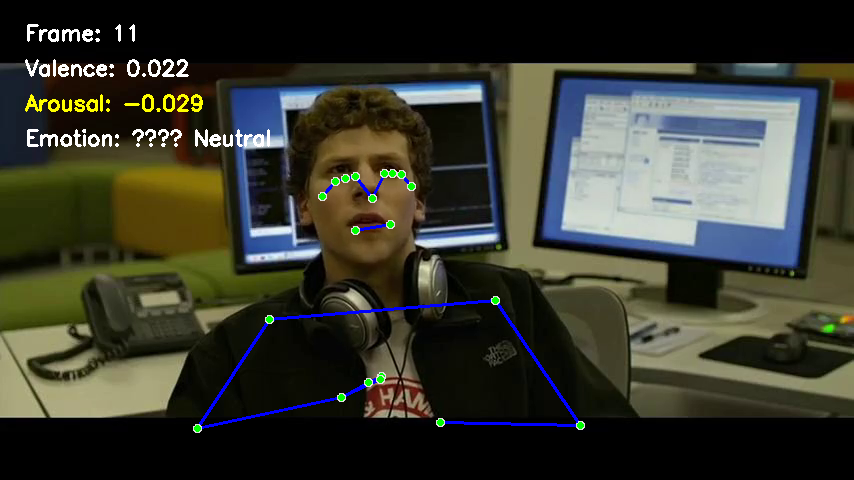

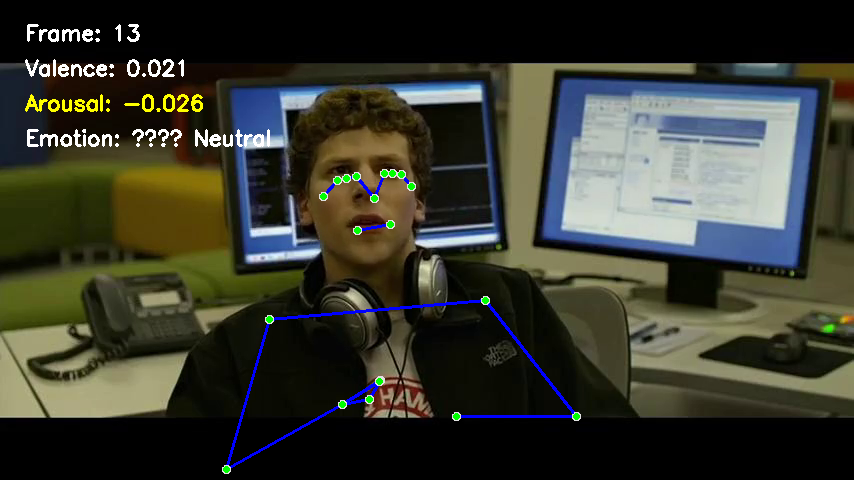

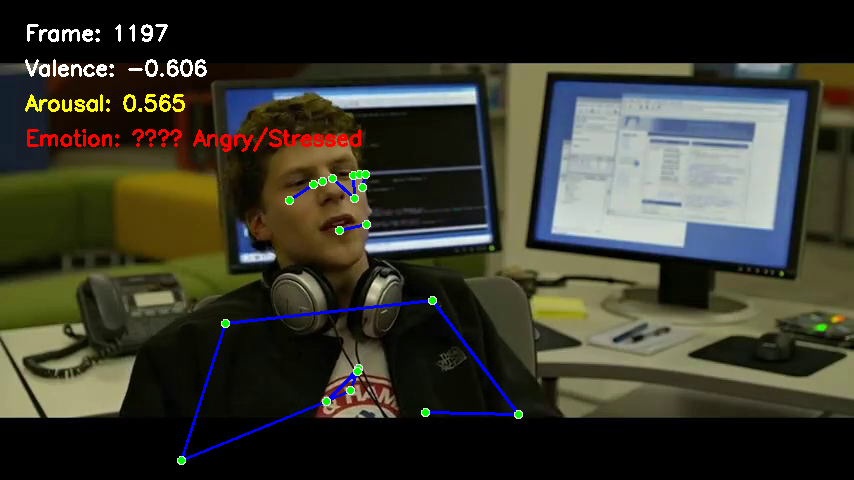

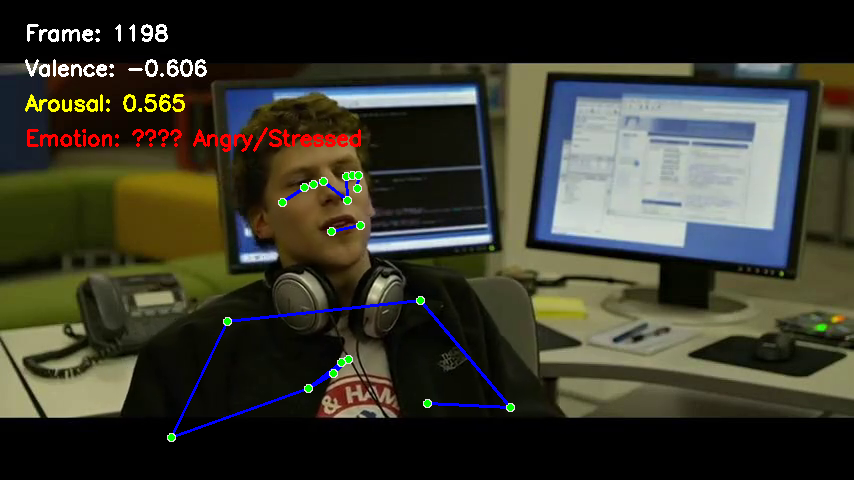

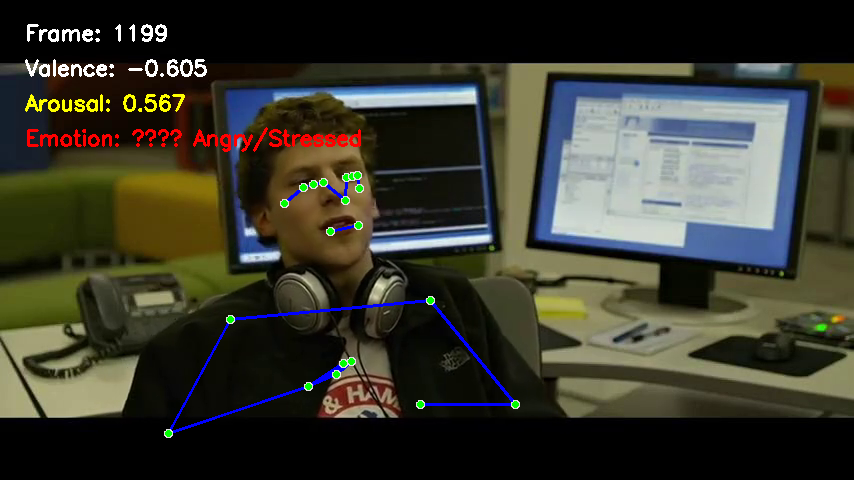


📊 REAL Emotion Analysis for 25.mp4:
Based on ACTUAL dataset values from rating_averaged files
----------------------------------------------------------------------
Frame   11: 😐 Neutral            (V:   0.022, A:  -0.029)
Frame   13: 😐 Neutral            (V:   0.021, A:  -0.026)
Frame 1197: 😠 Angry/Stressed     (V:  -0.606, A:   0.565)
Frame 1198: 😠 Angry/Stressed     (V:  -0.606, A:   0.565)
Frame 1199: 😠 Angry/Stressed     (V:  -0.605, A:   0.567)


In [3]:
import os
import re
import cv2
import pandas as pd
import mediapipe as mp
from google.colab.patches import cv2_imshow

# === Base paths ===
base_path = "/content/drive/MyDrive/Colab Notebooks/dataVideo"
videos_path = f"{base_path}/videos"
ratings_path = f"{base_path}/rating_averaged"

# === List all video and rating files ===
video_files = sorted([f for f in os.listdir(videos_path) if f.endswith(".mp4")])
valence_files = sorted([f for f in os.listdir(ratings_path) if 'valence' in f])
arousal_files = sorted([f for f in os.listdir(ratings_path) if 'arousal' in f])

print(f"🎥 Found {len(video_files)} videos")
print(f"🎭 Found {len(valence_files)} valence files")
print(f"🎯 Found {len(arousal_files)} arousal files")

# === Match video files to corresponding valence and arousal files ===
matches = []
for vid in video_files:
    vid_id = re.findall(r'\d+', vid)[0]
    valence_file = next((v for v in valence_files if vid_id == v.split('_')[0]), None)
    arousal_file = next((a for a in arousal_files if vid_id == a.split('_')[0]), None)
    if valence_file and arousal_file:
        matches.append((vid, valence_file, arousal_file))

print(f"✅ Matched {len(matches)} video-valence-arousal triplets.")

# === Initialize Mediapipe Pose ===
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5)

# === Emotion mapping function (ranges for VEATIC dataset) ===
def get_emotion(valence, arousal):
    if valence > 0.1 and arousal > 0.1:
        return "😊 Happy/Excited", (0, 255, 0)
    elif valence > 0.1 and arousal <= 0.1:
        return "😌 Relaxed/Calm", (100, 255, 100)
    elif valence < -0.1 and arousal > 0.1:
        return "😠 Angry/Stressed", (0, 0, 255)
    elif valence < -0.1 and arousal <= 0.1:
        return "😔 Sad/Depressed", (255, 0, 0)
    elif -0.1 <= valence <= 0.1 and -0.1 <= arousal <= 0.1:
        return "😐 Neutral", (255, 255, 255)
    else:
        return "🎭 Mixed", (255, 255, 0)

# === Select video 0 for testing ===
video_file, valence_file, arousal_file = "25.mp4", "25_valence.csv", "25_arousal.csv"
video_path = os.path.join(videos_path, video_file)
valence_path = os.path.join(ratings_path, valence_file)
arousal_path = os.path.join(ratings_path, arousal_file)

print(f"\n🎬 Using video: {video_file}")
print(f"🎭 Using valence file: {valence_file}")
print(f"🎯 Using arousal file: {arousal_file}")

# === Load emotion data ===
valence_df = pd.read_csv(valence_path, header=None)
arousal_df = pd.read_csv(arousal_path, header=None)
valence_data = valence_df.iloc[:, 1]
arousal_data = arousal_df.iloc[:, 1]

ratings_clean = pd.DataFrame({'valence': valence_data, 'arousal': arousal_data})
print(f"\n✅ Cleaned data shape: {ratings_clean.shape}")
print("First 10 rows of emotion data:")
print(ratings_clean.head(10))

# === Open video ===
cap = cv2.VideoCapture(video_path)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"\n🎥 Total frames in video: {total_frames}")
print(f"📊 Total emotion ratings available: {len(ratings_clean)}")

# === Select frames with emotional variation ===
high_arousal_frames = ratings_clean.nlargest(3, 'arousal').index.tolist()
low_valence_frames = ratings_clean.nsmallest(3, 'valence').index.tolist()
high_valence_frames = ratings_clean.nlargest(2, 'valence').index.tolist()
frame_indices = sorted(set(high_arousal_frames + low_valence_frames + high_valence_frames))[:5]
print(f"🎯 Selected frames with emotional variation: {frame_indices}")

# === Function to extract pose landmarks ===
def extract_pose(frame):
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    return pose.process(rgb)

# === Process video and display frames ===
frame_no = 0
frame_data = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_no in frame_indices:
        results = extract_pose(frame)
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(
                frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(255,0,0), thickness=2, circle_radius=2)
            )

        val = ratings_clean.loc[frame_no, 'valence']
        aro = ratings_clean.loc[frame_no, 'arousal']
        emotion, color = get_emotion(val, aro)

        # Overlay text
        y_offset = 40
        line_height = 35
        cv2.putText(frame, f"Frame: {frame_no}", (25, y_offset),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
        cv2.putText(frame, f"Valence: {val:.3f}", (25, y_offset + line_height),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
        cv2.putText(frame, f"Arousal: {aro:.3f}", (25, y_offset + line_height*2),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,255), 2)
        cv2.putText(frame, f"Emotion: {emotion}", (25, y_offset + line_height*3),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

        # Display frame in Colab
        cv2_imshow(frame)
        cv2.waitKey(1000)  # Wait 1 second per frame

        frame_data.append({
            'frame_no': frame_no,
            'valence': val,
            'arousal': aro,
            'emotion': emotion
        })

    frame_no += 1

cap.release()

# === Print frame-level emotion analysis ===
print(f"\n📊 REAL Emotion Analysis for {video_file}:")
print("=" * 70)
print("Based on ACTUAL dataset values from rating_averaged files")
print("-" * 70)
for data in frame_data:
    print(f"Frame {data['frame_no']:4d}: {data['emotion']:20} (V: {data['valence']:7.3f}, A: {data['arousal']:7.3f})")


plots

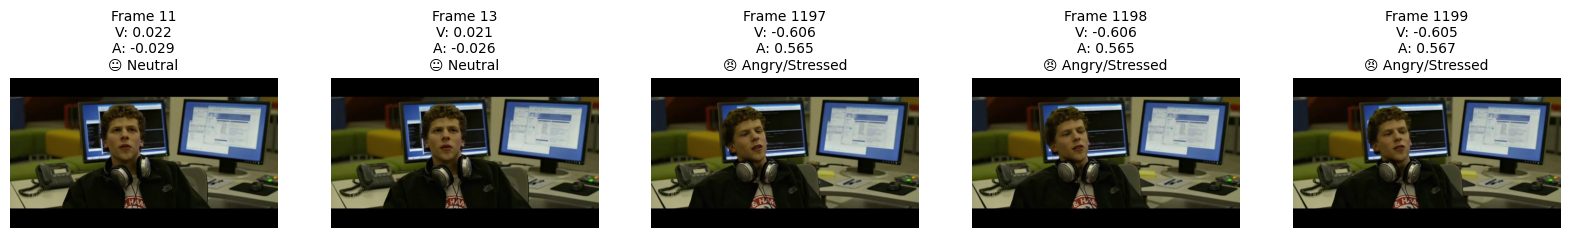

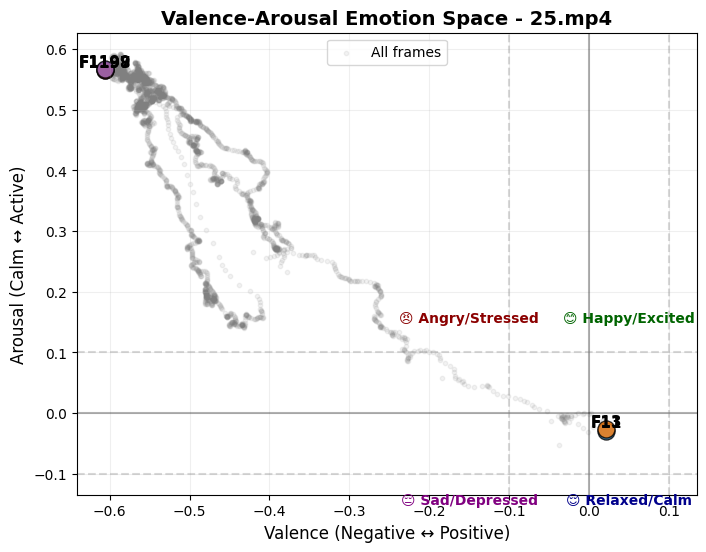

In [4]:
import matplotlib.pyplot as plt

# === Display selected frames with pose landmarks and emotion labels ===
plt.figure(figsize=(20, 6))

for i, data in enumerate(frame_data):
    frame_no = data['frame_no']
    # Reload the frame for plotting (to avoid cv2_imshow limitations in matplotlib)
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
    ret, frame = cap.read()
    if not ret:
        continue
    cap.release()
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    plt.subplot(1, len(frame_data), i + 1)
    plt.imshow(rgb_frame)
    plt.axis('off')
    plt.title(f"Frame {frame_no}\nV: {data['valence']:.3f}\nA: {data['arousal']:.3f}\n{data['emotion']}", fontsize=10)

# === Valence-Arousal scatter plot ===
plt.figure(figsize=(8, 6))
plt.scatter(ratings_clean['valence'], ratings_clean['arousal'], alpha=0.1, color='gray', s=10, label='All frames')

for data in frame_data:
    plt.scatter(data['valence'], data['arousal'], s=150, alpha=0.8, edgecolors='black')
    plt.text(data['valence'], data['arousal'] + 0.005, f"F{data['frame_no']}", fontsize=11, ha='center', fontweight='bold')

# Emotion quadrants
plt.text(0.05, 0.15, "😊 Happy/Excited", fontsize=10, ha='center', color='darkgreen', fontweight='bold')
plt.text(-0.15, 0.15, "😠 Angry/Stressed", fontsize=10, ha='center', color='darkred', fontweight='bold')
plt.text(0.05, -0.15, "😌 Relaxed/Calm", fontsize=10, ha='center', color='darkblue', fontweight='bold')
plt.text(-0.15, -0.15, "😔 Sad/Depressed", fontsize=10, ha='center', color='purple', fontweight='bold')

plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.axhline(y=0.1, color='gray', linestyle='--', alpha=0.3)
plt.axhline(y=-0.1, color='gray', linestyle='--', alpha=0.3)
plt.axvline(x=0.1, color='gray', linestyle='--', alpha=0.3)
plt.axvline(x=-0.1, color='gray', linestyle='--', alpha=0.3)

plt.xlabel('Valence (Negative ↔ Positive)', fontsize=12)
plt.ylabel('Arousal (Calm ↔ Active)', fontsize=12)
plt.title(f'Valence-Arousal Emotion Space - {video_file}', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.2)
plt.legend()
plt.show()


## 🧠 Notes: Video-Emotion Analysis

This notebook uses the **matches list** you built (containing all 124 video-rating pairs) to randomly pick and analyze a single pair.

---

## Steps:

### 1. Select a Random Pair
- Picks one full pair `(video.mp4, rating.csv)` for analysis.

### 2. Extract Random Frames
- Extracts **5 random frames** from the selected video.

### 3. Overlay Emotion Data
- Displays the **real valence/arousal data** on each extracted frame.

---

## 📌 MediaPipe Explanation

**MediaPipe** is a framework developed by Google for building **real-time perception pipelines**, commonly used in computer vision and human-computer interaction.  

In this notebook, MediaPipe is used to:

- Detect and extract **facial landmarks** (eyes, eyebrows, mouth, nose) and **pose landmarks** (hands, arms, body) from video frames.
- Provide **numerical landmark coordinates** that can be used to analyze **body language and facial expressions**.
- Enable the combination of these landmarks with emotion data (valence/arousal) to perform **multimodal emotion analysis**.

**Why MediaPipe?**  
It is lightweight, fast, and provides pre-trained models for **face, hand, and body tracking**, making it ideal for analyzing emotions in videos without heavy computation.


## 📌MediaPipePositions



.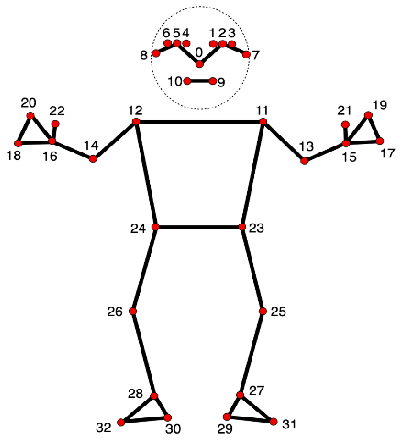
## 📌 MediaPipe Landmarks Table

| Component   | Landmark Group       | Index/Name Examples                           | Description / Use Case                                   |
|------------|--------------------|-----------------------------------------------|---------------------------------------------------------|
| Face       | 468 landmarks      | 0: chin, 33: left eye outer, 263: right eye outer, 13: nose tip, 61: mouth left, 291: mouth right | Used to track facial expressions, emotions, and head orientation. |
| Hands      | 21 landmarks       | 0: wrist, 1: thumb CMC, 4: thumb tip, 8: index tip, 12: middle tip, 16: ring tip, 20: pinky tip | Used to detect gestures, hand pose, and movement.      |
| Pose/Body  | 33 landmarks       | 0: nose, 11: left shoulder, 12: right shoulder, 23: left hip, 24: right hip, 25: left knee, 26: right knee, 27: left ankle, 28: right ankle | Used to analyze body posture, movement, and action.   |

**Notes:**
- Indices are from the MediaPipe pre-defined model.
- Coordinates are in **normalized image space** (x, y ∈ [0,1]) and z is relative depth.
- Combining **face + hands + body landmarks** allows full **body language and emotion analysis**.


----------------------------------------------------------------------

🧩  Feature Extraction Function for All Videos

We’ll extract pose landmarks (x, y, z, visibility) for each frame, then merge them with emotion annotations (valence/arousal).

In [ ]:
import tqdm

def extract_features_from_video(video_path, rating_path, sample_rate=10):
    """
    Extract pose landmarks + emotion values from a single video.
    - sample_rate: process every Nth frame to speed up extraction
    """
    cap = cv2.VideoCapture(video_path)
    ratings = pd.read_csv(rating_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    features = []
    frame_idx = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_idx % sample_rate == 0:
            results = extract_pose(frame)
            if results.pose_landmarks:
                row = []
                for lm in results.pose_landmarks.landmark:
                    row.extend([lm.x, lm.y, lm.z, lm.visibility])

                # Add valence/arousal values
                if frame_idx < len(ratings):
                    val = ratings.loc[frame_idx, 'valence'] if 'valence' in ratings else np.nan
                    aro = ratings.loc[frame_idx, 'arousal'] if 'arousal' in ratings else np.nan
                else:
                    val, aro = np.nan, np.nan

                row.extend([val, aro])
                features.append(row)

        frame_idx += 1

    cap.release()

    # Create dataframe
    landmark_cols = [f"{axis}_{i}" for i in range(33) for axis in ['x', 'y', 'z', 'vis']]
    df = pd.DataFrame(features, columns=landmark_cols + ['valence', 'arousal'])
    return df


Process All Video–Rating Pairs

Extracting features

In [ ]:
import re

# Debug version to see the matching process
print("=== DEBUG MATCHING ===")
print(f"Video files: {video_files[:5]}...")
print(f"Rating files: {rating_files[:5]}...")

matches = []
for vid in video_files:
    vid_id = re.findall(r'\d+', vid)[0]
    print(f"\nLooking for match for video: {vid} (ID: {vid_id})")

    potential_matches = []
    for rate in rating_files:
        rate_id = re.findall(r'\d+', rate)[0]
        if vid_id in rate:
            potential_matches.append(rate)
            print(f"  Potential match: {rate} (contains {vid_id})")

    # Choose the best match (exact ID match)
    best_match = None
    for rate in potential_matches:
        rate_id = re.findall(r'\d+', rate)[0]
        if rate_id == vid_id:  # Exact match
            best_match = rate
            break

    if best_match:
        matches.append((vid, best_match))
        print(f"✅ Matched: {vid} -> {best_match}")
    elif potential_matches:
        # Fallback to first partial match (with warning)
        matches.append((vid, potential_matches[0]))
        print(f"⚠️ Using partial match: {vid} -> {potential_matches[0]}")
    else:
        print(f"❌ No match found for {vid}")

print(f"\n✅ Final matched {len(matches)} video-rating pairs.")
print("📦 Sample matches:", matches[:5])

=== DEBUG MATCHING ===
Video files: ['0.mp4', '1.mp4', '10.mp4', '100.mp4', '101.mp4']...
Rating files: ['0_arousal.csv', '0_valence.csv', '100_arousal.csv', '100_valence.csv', '101_arousal.csv']...

Looking for match for video: 0.mp4 (ID: 0)
  Potential match: 0_arousal.csv (contains 0)
  Potential match: 0_valence.csv (contains 0)
  Potential match: 100_arousal.csv (contains 0)
  Potential match: 100_valence.csv (contains 0)
  Potential match: 101_arousal.csv (contains 0)
  Potential match: 101_valence.csv (contains 0)
  Potential match: 102_arousal.csv (contains 0)
  Potential match: 102_valence.csv (contains 0)
  Potential match: 103_arousal.csv (contains 0)
  Potential match: 103_valence.csv (contains 0)
  Potential match: 104_arousal.csv (contains 0)
  Potential match: 104_valence.csv (contains 0)
  Potential match: 105_arousal.csv (contains 0)
  Potential match: 105_valence.csv (contains 0)
  Potential match: 106_arousal.csv (contains 0)
  Potential match: 106_valence.csv (conta

Extracting Features

In [ ]:
import os
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np
from tqdm import tqdm

# === Initialize Mediapipe Pose with optimized settings ===
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(
    static_image_mode=False,
    model_complexity=1,  # Use lighter model for speed
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

def extract_pose(frame):
    """Extract pose landmarks from a frame."""
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(rgb)
    return results

def extract_features_from_video(video_path, arousal_path, valence_path, sample_rate=10):
    """
    Extract pose landmarks + BOTH emotion values from a single video.
    """
    cap = cv2.VideoCapture(video_path)

    # Check if video opened successfully
    if not cap.isOpened():
        raise ValueError(f"Cannot open video: {video_path}")

    # Load BOTH rating files with error handling
    try:
        arousal_ratings = pd.read_csv(arousal_path) if arousal_path else None
        valence_ratings = pd.read_csv(valence_path) if valence_path else None

        print(f"📊 Arousal ratings: {len(arousal_ratings) if arousal_ratings is not None else 'MISSING'} frames")
        print(f"📊 Valence ratings: {len(valence_ratings) if valence_ratings is not None else 'MISSING'} frames")

    except Exception as e:
        raise ValueError(f"Cannot read rating files: {e}")

    # Get video properties
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    duration = total_frames / fps if fps > 0 else 0

    print(f"🎥 Video: {total_frames} frames, {fps:.1f} FPS, {duration:.1f}s")

    # Determine the minimum length to avoid index errors
    lengths = [total_frames]
    if arousal_ratings is not None:
        lengths.append(len(arousal_ratings))
    if valence_ratings is not None:
        lengths.append(len(valence_ratings))

    reference_frames = min(lengths)
    print(f"📈 Using reference length: {reference_frames} frames")

    features = []
    frames_processed = 0
    frames_with_pose = 0

    for frame_idx in tqdm(range(0, reference_frames, sample_rate), desc=f"Processing frames", leave=False):
        # Jump to the specific frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()

        if not ret:
            break

        results = extract_pose(frame)
        frames_processed += 1

        if results.pose_landmarks:
            row = []
            for lm in results.pose_landmarks.landmark:
                row.extend([lm.x, lm.y, lm.z, lm.visibility])

            # Get BOTH valence and arousal values
            arousal_val = np.nan
            valence_val = np.nan

            # Extract arousal value
            if arousal_ratings is not None and frame_idx < len(arousal_ratings):
                try:
                    # Try to get 'arousal' column, otherwise use first column
                    if 'arousal' in arousal_ratings.columns:
                        arousal_val = arousal_ratings.iloc[frame_idx]['arousal']
                    else:
                        arousal_val = arousal_ratings.iloc[frame_idx, 0]
                except (KeyError, IndexError):
                    arousal_val = np.nan

            # Extract valence value
            if valence_ratings is not None and frame_idx < len(valence_ratings):
                try:
                    # Try to get 'valence' column, otherwise use first column
                    if 'valence' in valence_ratings.columns:
                        valence_val = valence_ratings.iloc[frame_idx]['valence']
                    else:
                        valence_val = valence_ratings.iloc[frame_idx, 0]
                except (KeyError, IndexError):
                    valence_val = np.nan

            row.extend([arousal_val, valence_val])
            features.append(row)
            frames_with_pose += 1

    cap.release()

    print(f"✅ Processed: {frames_processed} frames, {frames_with_pose} with pose detected")

    # Build dataframe - only if we have features
    if features:
        landmark_cols = [f"{axis}_{i}" for i in range(33) for axis in ['x','y','z','vis']]
        df = pd.DataFrame(features, columns=landmark_cols + ['arousal','valence'])  # Note: arousal first, then valence
        return df
    else:
        print(f"⚠️ No pose landmarks detected in {video_path}")
        return pd.DataFrame()

# === Output directory ===
output_csv_dir = "/content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv"
os.makedirs(output_csv_dir, exist_ok=True)

# === Verify paths exist ===
print("🔍 Checking paths...")
print(f"Videos path exists: {os.path.exists(videos_path)}")
print(f"Ratings path exists: {os.path.exists(ratings_path)}")
print(f"Output path exists: {os.path.exists(output_csv_dir)}")

# === First, let's check what rating files we have ===
print("\n🔍 Analyzing rating files structure...")
rating_files = os.listdir(ratings_path)
arousal_files = [f for f in rating_files if 'arousal' in f.lower()]
valence_files = [f for f in rating_files if 'valence' in f.lower()]

print(f"Found {len(arousal_files)} arousal files and {len(valence_files)} valence files")

# === Create proper matches with both file types ===
def extract_id(filename):
    """Extract numeric ID from filename"""
    import re
    match = re.search(r'(\d+)', filename)
    return match.group(1) if match else None

# Build proper matches with both arousal and valence
proper_matches = []
for vid in video_files:
    vid_id = extract_id(vid)
    if not vid_id:
        continue

    # Find matching files
    arousal_file = next((f for f in arousal_files if extract_id(f) == vid_id), None)
    valence_file = next((f for f in valence_files if extract_id(f) == vid_id), None)

    if arousal_file and valence_file:
        proper_matches.append((vid, arousal_file, valence_file))
    elif arousal_file or valence_file:
        print(f"⚠️ Incomplete ratings for {vid}: Arousal={arousal_file is not None}, Valence={valence_file is not None}")
        proper_matches.append((vid, arousal_file, valence_file))
    else:
        print(f"❌ No rating files found for {vid}")

print(f"\n🎯 Created {len(proper_matches)} proper matches with both emotion types")

# === Loop over proper matches ===
all_feature_paths = []

print(f"🚀 Starting feature extraction for {len(proper_matches)} videos...")

for i, (vid, arousal_file, valence_file) in enumerate(tqdm(proper_matches, desc="Processing videos")):
    video_path = os.path.join(videos_path, vid)
    arousal_path = os.path.join(ratings_path, arousal_file) if arousal_file else None
    valence_path = os.path.join(ratings_path, valence_file) if valence_file else None

    print(f"\n--- Processing {i+1}/{len(proper_matches)}: {vid} ---")
    print(f"   Arousal: {arousal_file or 'MISSING'}")
    print(f"   Valence: {valence_file or 'MISSING'}")

    # Check if files exist
    if not os.path.exists(video_path):
        print(f"❌ Video file not found: {video_path}")
        continue

    if not arousal_path and not valence_path:
        print(f"❌ No rating files found for {vid}")
        continue

    try:
        df_features = extract_features_from_video(video_path, arousal_path, valence_path, sample_rate=10)

        # Only save if we extracted features
        if not df_features.empty:
            save_path = os.path.join(output_csv_dir, f"{os.path.splitext(vid)[0]}_features.csv")
            df_features.to_csv(save_path, index=False)
            all_feature_paths.append(save_path)
            print(f"💾 Saved features to: {save_path}")
            print(f"📊 Feature shape: {df_features.shape}")

            # Show data summary
            print(f"📈 Data summary - Arousal: [{df_features['arousal'].min():.3f}, {df_features['arousal'].max():.3f}], "
                  f"Valence: [{df_features['valence'].min():.3f}, {df_features['valence'].max():.3f}]")
        else:
            print(f"⚠️ No features extracted for {vid}")

    except Exception as e:
        print(f"❌ Error processing {vid}: {e}")
        continue

print(f"\n🎉 COMPLETED!")
print(f"✅ Successfully processed {len(all_feature_paths)} out of {len(proper_matches)} videos")
print(f"💾 All features saved in: {output_csv_dir}")

if all_feature_paths:
    print("📦 Sample saved files:")
    for path in all_feature_paths[:3]:
        file_size = os.path.getsize(path) / 1024  # KB
        print(f"   - {os.path.basename(path)} ({file_size:.1f} KB)")
else:
    print("❌ No features were extracted from any video!")

🔍 Checking paths...
Videos path exists: True
Ratings path exists: True
Output path exists: True

🔍 Analyzing rating files structure...
Found 124 arousal files and 124 valence files

🎯 Created 124 proper matches with both emotion types
🚀 Starting feature extraction for 124 videos...


Processing videos:   0%|          | 0/124 [00:00<?, ?it/s]


--- Processing 1/124: 0.mp4 ---
   Arousal: 0_arousal.csv
   Valence: 0_valence.csv
📊 Arousal ratings: 1442 frames
📊 Valence ratings: 1442 frames
🎥 Video: 1443 frames, 25.0 FPS, 57.7s
📈 Using reference length: 1442 frames



Processing videos:   1%|          | 1/124 [00:40<1:22:34, 40.28s/it]

✅ Processed: 145 frames, 134 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/0_features.csv
📊 Feature shape: (134, 134)
📈 Data summary - Arousal: [1.000, 1441.000], Valence: [1.000, 1441.000]

--- Processing 2/124: 1.mp4 ---
   Arousal: 1_arousal.csv
   Valence: 1_valence.csv
📊 Arousal ratings: 1618 frames
📊 Valence ratings: 1618 frames
🎥 Video: 1619 frames, 25.0 FPS, 64.8s
📈 Using reference length: 1618 frames



Processing videos:   2%|▏         | 2/124 [01:28<1:31:13, 44.87s/it]

✅ Processed: 162 frames, 137 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/1_features.csv
📊 Feature shape: (137, 134)
📈 Data summary - Arousal: [31.000, 1611.000], Valence: [31.000, 1611.000]

--- Processing 3/124: 10.mp4 ---
   Arousal: 10_arousal.csv
   Valence: 10_valence.csv
📊 Arousal ratings: 1689 frames
📊 Valence ratings: 1689 frames
🎥 Video: 1690 frames, 25.0 FPS, 67.6s
📈 Using reference length: 1689 frames



Processing videos:   2%|▏         | 3/124 [02:01<1:19:55, 39.63s/it]

✅ Processed: 169 frames, 155 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/10_features.csv
📊 Feature shape: (155, 134)
📈 Data summary - Arousal: [11.000, 1681.000], Valence: [11.000, 1681.000]

--- Processing 4/124: 100.mp4 ---
   Arousal: 100_arousal.csv
   Valence: 100_valence.csv
📊 Arousal ratings: 1331 frames
📊 Valence ratings: 1331 frames
🎥 Video: 1332 frames, 25.0 FPS, 53.3s
📈 Using reference length: 1331 frames



Processing videos:   3%|▎         | 4/124 [02:38<1:16:37, 38.31s/it]

✅ Processed: 134 frames, 130 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/100_features.csv
📊 Feature shape: (130, 134)
📈 Data summary - Arousal: [11.000, 1331.000], Valence: [11.000, 1331.000]

--- Processing 5/124: 101.mp4 ---
   Arousal: 101_arousal.csv
   Valence: 101_valence.csv
📊 Arousal ratings: 1331 frames
📊 Valence ratings: 1331 frames
🎥 Video: 1332 frames, 25.0 FPS, 53.3s
📈 Using reference length: 1331 frames



Processing videos:   4%|▍         | 5/124 [03:16<1:16:08, 38.39s/it]

✅ Processed: 134 frames, 130 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/101_features.csv
📊 Feature shape: (130, 134)
📈 Data summary - Arousal: [1.000, 1331.000], Valence: [1.000, 1331.000]

--- Processing 6/124: 102.mp4 ---
   Arousal: 102_arousal.csv
   Valence: 102_valence.csv
📊 Arousal ratings: 2837 frames
📊 Valence ratings: 2837 frames
🎥 Video: 2838 frames, 25.0 FPS, 113.5s
📈 Using reference length: 2837 frames



Processing videos:   5%|▍         | 6/124 [04:51<1:53:32, 57.74s/it]

✅ Processed: 284 frames, 271 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/102_features.csv
📊 Feature shape: (271, 134)
📈 Data summary - Arousal: [1.000, 2831.000], Valence: [1.000, 2831.000]

--- Processing 7/124: 103.mp4 ---
   Arousal: 103_arousal.csv
   Valence: 103_valence.csv
📊 Arousal ratings: 2837 frames
📊 Valence ratings: 2837 frames
🎥 Video: 2838 frames, 25.0 FPS, 113.5s
📈 Using reference length: 2837 frames



Processing videos:   6%|▌         | 7/124 [06:20<2:12:20, 67.87s/it]

✅ Processed: 284 frames, 271 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/103_features.csv
📊 Feature shape: (271, 134)
📈 Data summary - Arousal: [1.000, 2831.000], Valence: [1.000, 2831.000]

--- Processing 8/124: 104.mp4 ---
   Arousal: 104_arousal.csv
   Valence: 104_valence.csv
📊 Arousal ratings: 1951 frames
📊 Valence ratings: 1951 frames
🎥 Video: 1952 frames, 25.0 FPS, 78.1s
📈 Using reference length: 1951 frames



Processing videos:   6%|▋         | 8/124 [07:12<2:01:38, 62.92s/it]

✅ Processed: 196 frames, 193 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/104_features.csv
📊 Feature shape: (193, 134)
📈 Data summary - Arousal: [11.000, 1931.000], Valence: [11.000, 1931.000]

--- Processing 9/124: 105.mp4 ---
   Arousal: 105_arousal.csv
   Valence: 105_valence.csv
📊 Arousal ratings: 1951 frames
📊 Valence ratings: 1951 frames
🎥 Video: 1952 frames, 25.0 FPS, 78.1s
📈 Using reference length: 1951 frames



Processing videos:   7%|▋         | 9/124 [08:04<1:53:46, 59.36s/it]

✅ Processed: 196 frames, 193 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/105_features.csv
📊 Feature shape: (193, 134)
📈 Data summary - Arousal: [11.000, 1931.000], Valence: [11.000, 1931.000]

--- Processing 10/124: 106.mp4 ---
   Arousal: 106_arousal.csv
   Valence: 106_valence.csv
📊 Arousal ratings: 1815 frames
📊 Valence ratings: 1815 frames
🎥 Video: 1816 frames, 25.0 FPS, 72.6s
📈 Using reference length: 1815 frames



Processing videos:   8%|▊         | 10/124 [08:53<1:46:49, 56.22s/it]

✅ Processed: 182 frames, 173 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/106_features.csv
📊 Feature shape: (173, 134)
📈 Data summary - Arousal: [31.000, 1791.000], Valence: [31.000, 1791.000]

--- Processing 11/124: 107.mp4 ---
   Arousal: 107_arousal.csv
   Valence: 107_valence.csv
📊 Arousal ratings: 1815 frames
📊 Valence ratings: 1815 frames
🎥 Video: 1816 frames, 25.0 FPS, 72.6s
📈 Using reference length: 1815 frames



Processing videos:   9%|▉         | 11/124 [09:41<1:40:53, 53.57s/it]

✅ Processed: 182 frames, 173 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/107_features.csv
📊 Feature shape: (173, 134)
📈 Data summary - Arousal: [31.000, 1791.000], Valence: [31.000, 1791.000]

--- Processing 12/124: 108.mp4 ---
   Arousal: 108_arousal.csv
   Valence: 108_valence.csv
📊 Arousal ratings: 1531 frames
📊 Valence ratings: 1531 frames
🎥 Video: 1532 frames, 25.0 FPS, 61.3s
📈 Using reference length: 1531 frames



Processing videos:  10%|▉         | 12/124 [10:23<1:33:35, 50.14s/it]

✅ Processed: 154 frames, 147 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/108_features.csv
📊 Feature shape: (147, 134)
📈 Data summary - Arousal: [31.000, 1521.000], Valence: [31.000, 1521.000]

--- Processing 13/124: 109.mp4 ---
   Arousal: 109_arousal.csv
   Valence: 109_valence.csv
📊 Arousal ratings: 1531 frames
📊 Valence ratings: 1531 frames
🎥 Video: 1532 frames, 25.0 FPS, 61.3s
📈 Using reference length: 1531 frames



Processing videos:  10%|█         | 13/124 [11:05<1:28:13, 47.69s/it]

✅ Processed: 154 frames, 147 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/109_features.csv
📊 Feature shape: (147, 134)
📈 Data summary - Arousal: [31.000, 1521.000], Valence: [31.000, 1521.000]

--- Processing 14/124: 11.mp4 ---
   Arousal: 11_arousal.csv
   Valence: 11_valence.csv
📊 Arousal ratings: 3149 frames
📊 Valence ratings: 3149 frames
🎥 Video: 3150 frames, 25.0 FPS, 126.0s
📈 Using reference length: 3149 frames



Processing videos:  11%|█▏        | 14/124 [11:38<1:19:20, 43.28s/it]

✅ Processed: 315 frames, 258 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/11_features.csv
📊 Feature shape: (258, 134)
📈 Data summary - Arousal: [1.000, 3091.000], Valence: [1.000, 3091.000]

--- Processing 15/124: 110.mp4 ---
   Arousal: 110_arousal.csv
   Valence: 110_valence.csv
📊 Arousal ratings: 4470 frames
📊 Valence ratings: 4470 frames
🎥 Video: 4471 frames, 25.0 FPS, 178.8s
📈 Using reference length: 4470 frames



Processing videos:  12%|█▏        | 15/124 [13:45<2:04:37, 68.60s/it]

✅ Processed: 447 frames, 379 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/110_features.csv
📊 Feature shape: (379, 134)
📈 Data summary - Arousal: [1.000, 4461.000], Valence: [1.000, 4461.000]

--- Processing 16/124: 111.mp4 ---
   Arousal: 111_arousal.csv
   Valence: 111_valence.csv
📊 Arousal ratings: 4470 frames
📊 Valence ratings: 4470 frames
🎥 Video: 4471 frames, 25.0 FPS, 178.8s
📈 Using reference length: 4470 frames



Processing videos:  13%|█▎        | 16/124 [15:52<2:34:47, 86.00s/it]

✅ Processed: 447 frames, 380 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/111_features.csv
📊 Feature shape: (380, 134)
📈 Data summary - Arousal: [1.000, 4461.000], Valence: [1.000, 4461.000]

--- Processing 17/124: 112.mp4 ---
   Arousal: 112_arousal.csv
   Valence: 112_valence.csv
📊 Arousal ratings: 3231 frames
📊 Valence ratings: 3231 frames
🎥 Video: 3232 frames, 25.0 FPS, 129.3s
📈 Using reference length: 3231 frames



Processing videos:  14%|█▎        | 17/124 [17:32<2:40:52, 90.21s/it]

✅ Processed: 324 frames, 305 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/112_features.csv
📊 Feature shape: (305, 134)
📈 Data summary - Arousal: [11.000, 3231.000], Valence: [11.000, 3231.000]

--- Processing 18/124: 113.mp4 ---
   Arousal: 113_arousal.csv
   Valence: 113_valence.csv
📊 Arousal ratings: 3231 frames
📊 Valence ratings: 3231 frames
🎥 Video: 3232 frames, 25.0 FPS, 129.3s
📈 Using reference length: 3231 frames



Processing videos:  15%|█▍        | 18/124 [19:10<2:43:36, 92.61s/it]

✅ Processed: 324 frames, 305 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/113_features.csv
📊 Feature shape: (305, 134)
📈 Data summary - Arousal: [11.000, 3231.000], Valence: [11.000, 3231.000]

--- Processing 19/124: 114.mp4 ---
   Arousal: 114_arousal.csv
   Valence: 114_valence.csv
📊 Arousal ratings: 2086 frames
📊 Valence ratings: 2086 frames
🎥 Video: 2087 frames, 25.0 FPS, 83.5s
📈 Using reference length: 2086 frames



Processing videos:  15%|█▌        | 19/124 [20:15<2:27:20, 84.19s/it]

✅ Processed: 209 frames, 199 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/114_features.csv
📊 Feature shape: (199, 134)
📈 Data summary - Arousal: [1.000, 2081.000], Valence: [1.000, 2081.000]

--- Processing 20/124: 115.mp4 ---
   Arousal: 115_arousal.csv
   Valence: 115_valence.csv
📊 Arousal ratings: 2086 frames
📊 Valence ratings: 2086 frames
🎥 Video: 2087 frames, 25.0 FPS, 83.5s
📈 Using reference length: 2086 frames



Processing videos:  16%|█▌        | 20/124 [21:17<2:14:44, 77.74s/it]

✅ Processed: 209 frames, 197 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/115_features.csv
📊 Feature shape: (197, 134)
📈 Data summary - Arousal: [1.000, 2081.000], Valence: [1.000, 2081.000]

--- Processing 21/124: 116.mp4 ---
   Arousal: 116_arousal.csv
   Valence: 116_valence.csv
📊 Arousal ratings: 4336 frames
📊 Valence ratings: 4336 frames
🎥 Video: 4337 frames, 25.0 FPS, 173.5s
📈 Using reference length: 4336 frames



Processing frames: 100%|██████████| 434/434 [02:03<00:00,  2.33it/s]
                                                                    

✅ Processed: 434 frames, 398 with pose detected


Processing videos:  17%|█▋        | 21/124 [23:21<2:36:59, 91.45s/it]

💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/116_features.csv
📊 Feature shape: (398, 134)
📈 Data summary - Arousal: [21.000, 4331.000], Valence: [21.000, 4331.000]

--- Processing 22/124: 117.mp4 ---
   Arousal: 117_arousal.csv
   Valence: 117_valence.csv
📊 Arousal ratings: 4336 frames
📊 Valence ratings: 4336 frames
🎥 Video: 4337 frames, 25.0 FPS, 173.5s
📈 Using reference length: 4336 frames



Processing videos:  18%|█▊        | 22/124 [25:23<2:51:16, 100.75s/it]

✅ Processed: 434 frames, 398 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/117_features.csv
📊 Feature shape: (398, 134)
📈 Data summary - Arousal: [21.000, 4331.000], Valence: [21.000, 4331.000]

--- Processing 23/124: 118.mp4 ---
   Arousal: 118_arousal.csv
   Valence: 118_valence.csv
📊 Arousal ratings: 4029 frames
📊 Valence ratings: 4029 frames
🎥 Video: 4030 frames, 25.0 FPS, 161.2s
📈 Using reference length: 4029 frames



Processing videos:  19%|█▊        | 23/124 [27:31<3:03:06, 108.78s/it]

✅ Processed: 403 frames, 396 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/118_features.csv
📊 Feature shape: (396, 134)
📈 Data summary - Arousal: [1.000, 4021.000], Valence: [1.000, 4021.000]

--- Processing 24/124: 119.mp4 ---
   Arousal: 119_arousal.csv
   Valence: 119_valence.csv
📊 Arousal ratings: 4029 frames
📊 Valence ratings: 4029 frames
🎥 Video: 4030 frames, 25.0 FPS, 161.2s
📈 Using reference length: 4029 frames



Processing frames: 100%|██████████| 403/403 [02:07<00:00,  2.33it/s]
                                                                    

✅ Processed: 403 frames, 398 with pose detected


Processing videos:  19%|█▉        | 24/124 [29:38<3:10:45, 114.46s/it]

💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/119_features.csv
📊 Feature shape: (398, 134)
📈 Data summary - Arousal: [1.000, 4021.000], Valence: [1.000, 4021.000]

--- Processing 25/124: 12.mp4 ---
   Arousal: 12_arousal.csv
   Valence: 12_valence.csv
📊 Arousal ratings: 715 frames
📊 Valence ratings: 715 frames
🎥 Video: 716 frames, 25.0 FPS, 28.6s
📈 Using reference length: 715 frames



Processing videos:  20%|██        | 25/124 [29:52<2:19:09, 84.33s/it] 

✅ Processed: 72 frames, 56 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/12_features.csv
📊 Feature shape: (56, 134)
📈 Data summary - Arousal: [11.000, 711.000], Valence: [11.000, 711.000]

--- Processing 26/124: 120.mp4 ---
   Arousal: 120_arousal.csv
   Valence: 120_valence.csv
📊 Arousal ratings: 3329 frames
📊 Valence ratings: 3329 frames
🎥 Video: 3330 frames, 25.0 FPS, 133.2s
📈 Using reference length: 3329 frames



Processing videos:  21%|██        | 26/124 [31:23<2:21:02, 86.35s/it]

✅ Processed: 333 frames, 331 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/120_features.csv
📊 Feature shape: (331, 134)
📈 Data summary - Arousal: [11.000, 3321.000], Valence: [11.000, 3321.000]

--- Processing 27/124: 121.mp4 ---
   Arousal: 121_arousal.csv
   Valence: 121_valence.csv
📊 Arousal ratings: 3329 frames
📊 Valence ratings: 3329 frames
🎥 Video: 3330 frames, 25.0 FPS, 133.2s
📈 Using reference length: 3329 frames



Processing videos:  22%|██▏       | 27/124 [32:58<2:23:27, 88.73s/it]

✅ Processed: 333 frames, 332 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/121_features.csv
📊 Feature shape: (332, 134)
📈 Data summary - Arousal: [1.000, 3321.000], Valence: [1.000, 3321.000]

--- Processing 28/124: 122.mp4 ---
   Arousal: 122_arousal.csv
   Valence: 122_valence.csv
📊 Arousal ratings: 1266 frames
📊 Valence ratings: 1266 frames
🎥 Video: 1267 frames, 25.0 FPS, 50.7s
📈 Using reference length: 1266 frames



Processing videos:  23%|██▎       | 28/124 [33:38<1:58:29, 74.06s/it]

✅ Processed: 127 frames, 100 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/122_features.csv
📊 Feature shape: (100, 134)
📈 Data summary - Arousal: [31.000, 1261.000], Valence: [31.000, 1261.000]

--- Processing 29/124: 123.mp4 ---
   Arousal: 123_arousal.csv
   Valence: 123_valence.csv
📊 Arousal ratings: 1266 frames
📊 Valence ratings: 1266 frames
🎥 Video: 1267 frames, 25.0 FPS, 50.7s
📈 Using reference length: 1266 frames



Processing videos:  23%|██▎       | 29/124 [34:16<1:40:15, 63.32s/it]

✅ Processed: 127 frames, 100 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/123_features.csv
📊 Feature shape: (100, 134)
📈 Data summary - Arousal: [31.000, 1261.000], Valence: [31.000, 1261.000]

--- Processing 30/124: 13.mp4 ---
   Arousal: 13_arousal.csv
   Valence: 13_valence.csv
📊 Arousal ratings: 2175 frames
📊 Valence ratings: 2175 frames
🎥 Video: 2176 frames, 25.0 FPS, 87.0s
📈 Using reference length: 2175 frames



Processing videos:  24%|██▍       | 30/124 [34:32<1:17:02, 49.17s/it]

✅ Processed: 218 frames, 193 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/13_features.csv
📊 Feature shape: (193, 134)
📈 Data summary - Arousal: [11.000, 2161.000], Valence: [11.000, 2161.000]

--- Processing 31/124: 14.mp4 ---
   Arousal: 14_arousal.csv
   Valence: 14_valence.csv
📊 Arousal ratings: 1153 frames
📊 Valence ratings: 1153 frames
🎥 Video: 1154 frames, 25.0 FPS, 46.2s
📈 Using reference length: 1153 frames



Processing videos:  25%|██▌       | 31/124 [34:47<1:00:22, 38.95s/it]

✅ Processed: 116 frames, 106 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/14_features.csv
📊 Feature shape: (106, 134)
📈 Data summary - Arousal: [1.000, 1151.000], Valence: [1.000, 1151.000]

--- Processing 32/124: 15.mp4 ---
   Arousal: 15_arousal.csv
   Valence: 15_valence.csv
📊 Arousal ratings: 1871 frames
📊 Valence ratings: 1871 frames
🎥 Video: 1872 frames, 25.0 FPS, 74.9s
📈 Using reference length: 1871 frames



Processing videos:  26%|██▌       | 32/124 [35:35<1:03:37, 41.50s/it]

✅ Processed: 188 frames, 138 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/15_features.csv
📊 Feature shape: (138, 134)
📈 Data summary - Arousal: [1.000, 1841.000], Valence: [1.000, 1841.000]

--- Processing 33/124: 16.mp4 ---
   Arousal: 16_arousal.csv
   Valence: 16_valence.csv
📊 Arousal ratings: 2111 frames
📊 Valence ratings: 2111 frames
🎥 Video: 2112 frames, 25.0 FPS, 84.5s
📈 Using reference length: 2111 frames



Processing videos:  27%|██▋       | 33/124 [36:26<1:07:28, 44.49s/it]

✅ Processed: 212 frames, 203 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/16_features.csv
📊 Feature shape: (203, 134)
📈 Data summary - Arousal: [1.000, 2111.000], Valence: [1.000, 2111.000]

--- Processing 34/124: 17.mp4 ---
   Arousal: 17_arousal.csv
   Valence: 17_valence.csv
📊 Arousal ratings: 959 frames
📊 Valence ratings: 959 frames
🎥 Video: 960 frames, 25.0 FPS, 38.4s
📈 Using reference length: 959 frames



Processing videos:  27%|██▋       | 34/124 [36:48<56:33, 37.70s/it]  

✅ Processed: 96 frames, 79 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/17_features.csv
📊 Feature shape: (79, 134)
📈 Data summary - Arousal: [11.000, 951.000], Valence: [11.000, 951.000]

--- Processing 35/124: 18.mp4 ---
   Arousal: 18_arousal.csv
   Valence: 18_valence.csv
📊 Arousal ratings: 2351 frames
📊 Valence ratings: 2351 frames
🎥 Video: 2352 frames, 25.0 FPS, 94.1s
📈 Using reference length: 2351 frames



Processing videos:  28%|██▊       | 35/124 [37:33<59:16, 39.96s/it]

✅ Processed: 236 frames, 142 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/18_features.csv
📊 Feature shape: (142, 134)
📈 Data summary - Arousal: [1.000, 2321.000], Valence: [1.000, 2321.000]

--- Processing 36/124: 19.mp4 ---
   Arousal: 19_arousal.csv
   Valence: 19_valence.csv
📊 Arousal ratings: 719 frames
📊 Valence ratings: 719 frames
🎥 Video: 720 frames, 25.0 FPS, 28.8s
📈 Using reference length: 719 frames



Processing videos:  29%|██▉       | 36/124 [37:51<48:57, 33.38s/it]

✅ Processed: 72 frames, 71 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/19_features.csv
📊 Feature shape: (71, 134)
📈 Data summary - Arousal: [1.000, 711.000], Valence: [1.000, 711.000]

--- Processing 37/124: 2.mp4 ---
   Arousal: 2_arousal.csv
   Valence: 2_valence.csv
📊 Arousal ratings: 1153 frames
📊 Valence ratings: 1153 frames
🎥 Video: 1154 frames, 25.0 FPS, 46.2s
📈 Using reference length: 1153 frames



Processing videos:  30%|██▉       | 37/124 [38:27<49:39, 34.25s/it]

✅ Processed: 116 frames, 101 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/2_features.csv
📊 Feature shape: (101, 134)
📈 Data summary - Arousal: [1.000, 1151.000], Valence: [1.000, 1151.000]

--- Processing 38/124: 20.mp4 ---
   Arousal: 20_arousal.csv
   Valence: 20_valence.csv
📊 Arousal ratings: 452 frames
📊 Valence ratings: 452 frames
🎥 Video: 453 frames, 25.0 FPS, 18.1s
📈 Using reference length: 452 frames



Processing videos:  31%|███       | 38/124 [38:31<35:43, 24.92s/it]

✅ Processed: 46 frames, 46 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/20_features.csv
📊 Feature shape: (46, 134)
📈 Data summary - Arousal: [1.000, 451.000], Valence: [1.000, 451.000]

--- Processing 39/124: 21.mp4 ---
   Arousal: 21_arousal.csv
   Valence: 21_valence.csv
📊 Arousal ratings: 899 frames
📊 Valence ratings: 899 frames
🎥 Video: 900 frames, 25.0 FPS, 36.0s
📈 Using reference length: 899 frames



Processing videos:  31%|███▏      | 39/124 [38:48<32:06, 22.67s/it]

✅ Processed: 90 frames, 74 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/21_features.csv
📊 Feature shape: (74, 134)
📈 Data summary - Arousal: [11.000, 891.000], Valence: [11.000, 891.000]

--- Processing 40/124: 22.mp4 ---
   Arousal: 22_arousal.csv
   Valence: 22_valence.csv
📊 Arousal ratings: 2039 frames
📊 Valence ratings: 2039 frames
🎥 Video: 2040 frames, 25.0 FPS, 81.6s
📈 Using reference length: 2039 frames



Processing videos:  32%|███▏      | 40/124 [39:28<39:10, 27.98s/it]

✅ Processed: 204 frames, 186 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/22_features.csv
📊 Feature shape: (186, 134)
📈 Data summary - Arousal: [11.000, 2031.000], Valence: [11.000, 2031.000]

--- Processing 41/124: 23.mp4 ---
   Arousal: 23_arousal.csv
   Valence: 23_valence.csv
📊 Arousal ratings: 1437 frames
📊 Valence ratings: 1437 frames
🎥 Video: 1438 frames, 25.0 FPS, 57.5s
📈 Using reference length: 1437 frames



Processing videos:  33%|███▎      | 41/124 [39:55<38:18, 27.70s/it]

✅ Processed: 144 frames, 131 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/23_features.csv
📊 Feature shape: (131, 134)
📈 Data summary - Arousal: [11.000, 1431.000], Valence: [11.000, 1431.000]

--- Processing 42/124: 24.mp4 ---
   Arousal: 24_arousal.csv
   Valence: 24_valence.csv
📊 Arousal ratings: 2893 frames
📊 Valence ratings: 2893 frames
🎥 Video: 2894 frames, 25.0 FPS, 115.8s
📈 Using reference length: 2893 frames



Processing videos:  34%|███▍      | 42/124 [40:55<50:49, 37.19s/it]

✅ Processed: 290 frames, 260 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/24_features.csv
📊 Feature shape: (260, 134)
📈 Data summary - Arousal: [171.000, 2891.000], Valence: [171.000, 2891.000]

--- Processing 43/124: 25.mp4 ---
   Arousal: 25_arousal.csv
   Valence: 25_valence.csv
📊 Arousal ratings: 2849 frames
📊 Valence ratings: 2849 frames
🎥 Video: 2850 frames, 25.0 FPS, 114.0s
📈 Using reference length: 2849 frames



Processing videos:  35%|███▍      | 43/124 [41:44<54:58, 40.73s/it]

✅ Processed: 285 frames, 279 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/25_features.csv
📊 Feature shape: (279, 134)
📈 Data summary - Arousal: [11.000, 2841.000], Valence: [11.000, 2841.000]

--- Processing 44/124: 26.mp4 ---
   Arousal: 26_arousal.csv
   Valence: 26_valence.csv
📊 Arousal ratings: 1842 frames
📊 Valence ratings: 1842 frames
🎥 Video: 1843 frames, 25.0 FPS, 73.7s
📈 Using reference length: 1842 frames



Processing videos:  35%|███▌      | 44/124 [42:12<49:22, 37.03s/it]

✅ Processed: 185 frames, 85 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/26_features.csv
📊 Feature shape: (85, 134)
📈 Data summary - Arousal: [1.000, 1841.000], Valence: [1.000, 1841.000]

--- Processing 45/124: 27.mp4 ---
   Arousal: 27_arousal.csv
   Valence: 27_valence.csv
📊 Arousal ratings: 2342 frames
📊 Valence ratings: 2342 frames
🎥 Video: 2343 frames, 25.0 FPS, 93.7s
📈 Using reference length: 2342 frames



Processing videos:  36%|███▋      | 45/124 [42:44<46:48, 35.55s/it]

✅ Processed: 235 frames, 132 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/27_features.csv
📊 Feature shape: (132, 134)
📈 Data summary - Arousal: [51.000, 2331.000], Valence: [51.000, 2331.000]

--- Processing 46/124: 28.mp4 ---
   Arousal: 28_arousal.csv
   Valence: 28_valence.csv
📊 Arousal ratings: 1223 frames
📊 Valence ratings: 1223 frames
🎥 Video: 1224 frames, 25.0 FPS, 49.0s
📈 Using reference length: 1223 frames



Processing videos:  37%|███▋      | 46/124 [43:06<40:41, 31.30s/it]

✅ Processed: 123 frames, 116 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/28_features.csv
📊 Feature shape: (116, 134)
📈 Data summary - Arousal: [1.000, 1161.000], Valence: [1.000, 1161.000]

--- Processing 47/124: 29.mp4 ---
   Arousal: 29_arousal.csv
   Valence: 29_valence.csv
📊 Arousal ratings: 3287 frames
📊 Valence ratings: 3287 frames
🎥 Video: 3288 frames, 25.0 FPS, 131.5s
📈 Using reference length: 3287 frames



Processing videos:  38%|███▊      | 47/124 [44:32<1:01:23, 47.84s/it]

✅ Processed: 329 frames, 222 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/29_features.csv
📊 Feature shape: (222, 134)
📈 Data summary - Arousal: [1.000, 3281.000], Valence: [1.000, 3281.000]

--- Processing 48/124: 3.mp4 ---
   Arousal: 3_arousal.csv
   Valence: 3_valence.csv
📊 Arousal ratings: 3929 frames
📊 Valence ratings: 3929 frames
🎥 Video: 3930 frames, 25.0 FPS, 157.2s
📈 Using reference length: 3929 frames



Processing videos:  39%|███▊      | 48/124 [45:24<1:02:20, 49.22s/it]

✅ Processed: 393 frames, 342 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/3_features.csv
📊 Feature shape: (342, 134)
📈 Data summary - Arousal: [1.000, 3921.000], Valence: [1.000, 3921.000]

--- Processing 49/124: 30.mp4 ---
   Arousal: 30_arousal.csv
   Valence: 30_valence.csv
📊 Arousal ratings: 2040 frames
📊 Valence ratings: 2040 frames
🎥 Video: 2041 frames, 25.0 FPS, 81.6s
📈 Using reference length: 2040 frames



Processing videos:  40%|███▉      | 49/124 [45:50<52:49, 42.26s/it]  

✅ Processed: 204 frames, 184 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/30_features.csv
📊 Feature shape: (184, 134)
📈 Data summary - Arousal: [1.000, 2011.000], Valence: [1.000, 2011.000]

--- Processing 50/124: 31.mp4 ---
   Arousal: 31_arousal.csv
   Valence: 31_valence.csv
📊 Arousal ratings: 2039 frames
📊 Valence ratings: 2039 frames
🎥 Video: 2040 frames, 25.0 FPS, 81.6s
📈 Using reference length: 2039 frames



Processing videos:  40%|████      | 50/124 [46:46<57:07, 46.32s/it]

✅ Processed: 204 frames, 173 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/31_features.csv
📊 Feature shape: (173, 134)
📈 Data summary - Arousal: [91.000, 2021.000], Valence: [91.000, 2021.000]

--- Processing 51/124: 32.mp4 ---
   Arousal: 32_arousal.csv
   Valence: 32_valence.csv
📊 Arousal ratings: 3717 frames
📊 Valence ratings: 3717 frames
🎥 Video: 3718 frames, 25.0 FPS, 148.7s
📈 Using reference length: 3717 frames



Processing videos:  41%|████      | 51/124 [48:18<1:13:03, 60.04s/it]

✅ Processed: 372 frames, 338 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/32_features.csv
📊 Feature shape: (338, 134)
📈 Data summary - Arousal: [41.000, 3711.000], Valence: [41.000, 3711.000]

--- Processing 52/124: 33.mp4 ---
   Arousal: 33_arousal.csv
   Valence: 33_valence.csv
📊 Arousal ratings: 2299 frames
📊 Valence ratings: 2299 frames
🎥 Video: 2300 frames, 25.0 FPS, 92.0s
📈 Using reference length: 2299 frames



Processing videos:  42%|████▏     | 52/124 [49:08<1:08:27, 57.05s/it]

✅ Processed: 230 frames, 229 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/33_features.csv
📊 Feature shape: (229, 134)
📈 Data summary - Arousal: [1.000, 2291.000], Valence: [1.000, 2291.000]

--- Processing 53/124: 34.mp4 ---
   Arousal: 34_arousal.csv
   Valence: 34_valence.csv
📊 Arousal ratings: 2159 frames
📊 Valence ratings: 2159 frames
🎥 Video: 2160 frames, 25.0 FPS, 86.4s
📈 Using reference length: 2159 frames



Processing frames: 100%|██████████| 216/216 [00:50<00:00,  3.27it/s]
                                                                    

✅ Processed: 216 frames, 191 with pose detected


Processing videos:  43%|████▎     | 53/124 [49:59<1:05:20, 55.22s/it]

💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/34_features.csv
📊 Feature shape: (191, 134)
📈 Data summary - Arousal: [1.000, 2151.000], Valence: [1.000, 2151.000]

--- Processing 54/124: 35.mp4 ---
   Arousal: 35_arousal.csv
   Valence: 35_valence.csv
📊 Arousal ratings: 2249 frames
📊 Valence ratings: 2249 frames
🎥 Video: 2250 frames, 25.0 FPS, 90.0s
📈 Using reference length: 2249 frames



Processing videos:  44%|████▎     | 54/124 [50:48<1:02:00, 53.16s/it]

✅ Processed: 225 frames, 134 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/35_features.csv
📊 Feature shape: (134, 134)
📈 Data summary - Arousal: [111.000, 2241.000], Valence: [111.000, 2241.000]

--- Processing 55/124: 36.mp4 ---
   Arousal: 36_arousal.csv
   Valence: 36_valence.csv
📊 Arousal ratings: 1439 frames
📊 Valence ratings: 1439 frames
🎥 Video: 1440 frames, 25.0 FPS, 57.6s
📈 Using reference length: 1439 frames



Processing videos:  44%|████▍     | 55/124 [51:15<52:15, 45.44s/it]  

✅ Processed: 144 frames, 109 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/36_features.csv
📊 Feature shape: (109, 134)
📈 Data summary - Arousal: [11.000, 1411.000], Valence: [11.000, 1411.000]

--- Processing 56/124: 37.mp4 ---
   Arousal: 37_arousal.csv
   Valence: 37_valence.csv
📊 Arousal ratings: 1799 frames
📊 Valence ratings: 1799 frames
🎥 Video: 1800 frames, 25.0 FPS, 72.0s
📈 Using reference length: 1799 frames



Processing videos:  45%|████▌     | 56/124 [52:07<53:32, 47.24s/it]

✅ Processed: 180 frames, 180 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/37_features.csv
📊 Feature shape: (180, 134)
📈 Data summary - Arousal: [1.000, 1791.000], Valence: [1.000, 1791.000]

--- Processing 57/124: 38.mp4 ---
   Arousal: 38_arousal.csv
   Valence: 38_valence.csv
📊 Arousal ratings: 2687 frames
📊 Valence ratings: 2687 frames
🎥 Video: 2688 frames, 25.0 FPS, 107.5s
📈 Using reference length: 2687 frames



Processing videos:  46%|████▌     | 57/124 [53:10<58:05, 52.02s/it]

✅ Processed: 269 frames, 264 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/38_features.csv
📊 Feature shape: (264, 134)
📈 Data summary - Arousal: [11.000, 2671.000], Valence: [11.000, 2671.000]

--- Processing 58/124: 39.mp4 ---
   Arousal: 39_arousal.csv
   Valence: 39_valence.csv
📊 Arousal ratings: 3359 frames
📊 Valence ratings: 3359 frames
🎥 Video: 3360 frames, 25.0 FPS, 134.4s
📈 Using reference length: 3359 frames



Processing frames: 100%|██████████| 336/336 [01:22<00:00,  3.58it/s]
                                                                    

✅ Processed: 336 frames, 304 with pose detected


Processing videos:  47%|████▋     | 58/124 [54:33<1:07:25, 61.30s/it]

💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/39_features.csv
📊 Feature shape: (304, 134)
📈 Data summary - Arousal: [1.000, 3351.000], Valence: [1.000, 3351.000]

--- Processing 59/124: 4.mp4 ---
   Arousal: 4_arousal.csv
   Valence: 4_valence.csv
📊 Arousal ratings: 1453 frames
📊 Valence ratings: 1453 frames
🎥 Video: 1454 frames, 25.0 FPS, 58.2s
📈 Using reference length: 1453 frames



Processing videos:  48%|████▊     | 59/124 [55:08<58:05, 53.62s/it]  

✅ Processed: 146 frames, 93 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/4_features.csv
📊 Feature shape: (93, 134)
📈 Data summary - Arousal: [11.000, 1451.000], Valence: [11.000, 1451.000]

--- Processing 60/124: 40.mp4 ---
   Arousal: 40_arousal.csv
   Valence: 40_valence.csv
📊 Arousal ratings: 1919 frames
📊 Valence ratings: 1919 frames
🎥 Video: 1920 frames, 25.0 FPS, 76.8s
📈 Using reference length: 1919 frames



Processing videos:  48%|████▊     | 60/124 [55:50<53:26, 50.10s/it]

✅ Processed: 192 frames, 192 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/40_features.csv
📊 Feature shape: (192, 134)
📈 Data summary - Arousal: [1.000, 1911.000], Valence: [1.000, 1911.000]

--- Processing 61/124: 41.mp4 ---
   Arousal: 41_arousal.csv
   Valence: 41_valence.csv
📊 Arousal ratings: 2494 frames
📊 Valence ratings: 2494 frames
🎥 Video: 2495 frames, 25.0 FPS, 99.8s
📈 Using reference length: 2494 frames



Processing videos:  49%|████▉     | 61/124 [56:28<48:47, 46.47s/it]

✅ Processed: 250 frames, 243 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/41_features.csv
📊 Feature shape: (243, 134)
📈 Data summary - Arousal: [1.000, 2491.000], Valence: [1.000, 2491.000]

--- Processing 62/124: 42.mp4 ---
   Arousal: 42_arousal.csv
   Valence: 42_valence.csv
📊 Arousal ratings: 2159 frames
📊 Valence ratings: 2159 frames
🎥 Video: 2160 frames, 25.0 FPS, 86.4s
📈 Using reference length: 2159 frames



Processing videos:  50%|█████     | 62/124 [57:20<49:29, 47.90s/it]

✅ Processed: 216 frames, 197 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/42_features.csv
📊 Feature shape: (197, 134)
📈 Data summary - Arousal: [1.000, 2151.000], Valence: [1.000, 2151.000]

--- Processing 63/124: 43.mp4 ---
   Arousal: 43_arousal.csv
   Valence: 43_valence.csv
📊 Arousal ratings: 1799 frames
📊 Valence ratings: 1799 frames
🎥 Video: 1800 frames, 25.0 FPS, 72.0s
📈 Using reference length: 1799 frames



Processing videos:  51%|█████     | 63/124 [58:14<50:47, 49.95s/it]

✅ Processed: 180 frames, 104 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/43_features.csv
📊 Feature shape: (104, 134)
📈 Data summary - Arousal: [141.000, 1791.000], Valence: [141.000, 1791.000]

--- Processing 64/124: 44.mp4 ---
   Arousal: 44_arousal.csv
   Valence: 44_valence.csv
📊 Arousal ratings: 1463 frames
📊 Valence ratings: 1463 frames
🎥 Video: 1464 frames, 25.0 FPS, 58.6s
📈 Using reference length: 1463 frames



Processing videos:  52%|█████▏    | 64/124 [59:00<48:35, 48.60s/it]

✅ Processed: 147 frames, 124 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/44_features.csv
📊 Feature shape: (124, 134)
📈 Data summary - Arousal: [11.000, 1461.000], Valence: [11.000, 1461.000]

--- Processing 65/124: 45.mp4 ---
   Arousal: 45_arousal.csv
   Valence: 45_valence.csv
📊 Arousal ratings: 1559 frames
📊 Valence ratings: 1559 frames
🎥 Video: 1560 frames, 25.0 FPS, 62.4s
📈 Using reference length: 1559 frames



Processing videos:  52%|█████▏    | 65/124 [59:31<42:48, 43.53s/it]

✅ Processed: 156 frames, 146 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/45_features.csv
📊 Feature shape: (146, 134)
📈 Data summary - Arousal: [1.000, 1551.000], Valence: [1.000, 1551.000]

--- Processing 66/124: 46.mp4 ---
   Arousal: 46_arousal.csv
   Valence: 46_valence.csv
📊 Arousal ratings: 3232 frames
📊 Valence ratings: 3232 frames
🎥 Video: 3233 frames, 25.0 FPS, 129.3s
📈 Using reference length: 3232 frames



Processing videos:  53%|█████▎    | 66/124 [59:56<36:43, 37.98s/it]

✅ Processed: 324 frames, 318 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/46_features.csv
📊 Feature shape: (318, 134)
📈 Data summary - Arousal: [1.000, 3231.000], Valence: [1.000, 3231.000]

--- Processing 67/124: 47.mp4 ---
   Arousal: 47_arousal.csv
   Valence: 47_valence.csv
📊 Arousal ratings: 1439 frames
📊 Valence ratings: 1439 frames
🎥 Video: 1440 frames, 25.0 FPS, 57.6s
📈 Using reference length: 1439 frames



Processing videos:  54%|█████▍    | 67/124 [1:00:40<37:33, 39.53s/it]

✅ Processed: 144 frames, 93 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/47_features.csv
📊 Feature shape: (93, 134)
📈 Data summary - Arousal: [11.000, 1411.000], Valence: [11.000, 1411.000]

--- Processing 68/124: 48.mp4 ---
   Arousal: 48_arousal.csv
   Valence: 48_valence.csv
📊 Arousal ratings: 2135 frames
📊 Valence ratings: 2135 frames
🎥 Video: 2136 frames, 25.0 FPS, 85.4s
📈 Using reference length: 2135 frames



Processing videos:  55%|█████▍    | 68/124 [1:01:31<40:20, 43.22s/it]

✅ Processed: 214 frames, 210 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/48_features.csv
📊 Feature shape: (210, 134)
📈 Data summary - Arousal: [1.000, 2131.000], Valence: [1.000, 2131.000]

--- Processing 69/124: 49.mp4 ---
   Arousal: 49_arousal.csv
   Valence: 49_valence.csv
📊 Arousal ratings: 2183 frames
📊 Valence ratings: 2183 frames
🎥 Video: 2184 frames, 25.0 FPS, 87.4s
📈 Using reference length: 2183 frames



Processing videos:  56%|█████▌    | 69/124 [1:02:28<43:10, 47.09s/it]

✅ Processed: 219 frames, 199 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/49_features.csv
📊 Feature shape: (199, 134)
📈 Data summary - Arousal: [1.000, 2181.000], Valence: [1.000, 2181.000]

--- Processing 70/124: 5.mp4 ---
   Arousal: 5_arousal.csv
   Valence: 5_valence.csv
📊 Arousal ratings: 2576 frames
📊 Valence ratings: 2576 frames
🎥 Video: 2577 frames, 25.0 FPS, 103.1s
📈 Using reference length: 2576 frames



Processing videos:  56%|█████▋    | 70/124 [1:02:59<38:08, 42.38s/it]

✅ Processed: 258 frames, 205 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/5_features.csv
📊 Feature shape: (205, 134)
📈 Data summary - Arousal: [1.000, 2571.000], Valence: [1.000, 2571.000]

--- Processing 71/124: 50.mp4 ---
   Arousal: 50_arousal.csv
   Valence: 50_valence.csv
📊 Arousal ratings: 1848 frames
📊 Valence ratings: 1848 frames
🎥 Video: 1849 frames, 25.0 FPS, 74.0s
📈 Using reference length: 1848 frames



Processing videos:  57%|█████▋    | 71/124 [1:03:32<34:54, 39.51s/it]

✅ Processed: 185 frames, 182 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/50_features.csv
📊 Feature shape: (182, 134)
📈 Data summary - Arousal: [11.000, 1841.000], Valence: [11.000, 1841.000]

--- Processing 72/124: 51.mp4 ---
   Arousal: 51_arousal.csv
   Valence: 51_valence.csv
📊 Arousal ratings: 1811 frames
📊 Valence ratings: 1811 frames
🎥 Video: 1812 frames, 25.0 FPS, 72.5s
📈 Using reference length: 1811 frames



Processing videos:  58%|█████▊    | 72/124 [1:03:48<28:06, 32.44s/it]

✅ Processed: 182 frames, 178 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/51_features.csv
📊 Feature shape: (178, 134)
📈 Data summary - Arousal: [31.000, 1811.000], Valence: [31.000, 1811.000]

--- Processing 73/124: 52.mp4 ---
   Arousal: 52_arousal.csv
   Valence: 52_valence.csv
📊 Arousal ratings: 263 frames
📊 Valence ratings: 263 frames
🎥 Video: 264 frames, 25.0 FPS, 10.6s
📈 Using reference length: 263 frames



Processing videos:  59%|█████▉    | 73/124 [1:03:52<20:26, 24.06s/it]

✅ Processed: 27 frames, 27 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/52_features.csv
📊 Feature shape: (27, 134)
📈 Data summary - Arousal: [1.000, 261.000], Valence: [1.000, 261.000]

--- Processing 74/124: 53.mp4 ---
   Arousal: 53_arousal.csv
   Valence: 53_valence.csv
📊 Arousal ratings: 1295 frames
📊 Valence ratings: 1295 frames
🎥 Video: 1296 frames, 25.0 FPS, 51.8s
📈 Using reference length: 1295 frames



Processing videos:  60%|█████▉    | 74/124 [1:04:33<24:13, 29.06s/it]

✅ Processed: 130 frames, 81 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/53_features.csv
📊 Feature shape: (81, 134)
📈 Data summary - Arousal: [1.000, 1291.000], Valence: [1.000, 1291.000]

--- Processing 75/124: 54.mp4 ---
   Arousal: 54_arousal.csv
   Valence: 54_valence.csv
📊 Arousal ratings: 863 frames
📊 Valence ratings: 863 frames
🎥 Video: 864 frames, 25.0 FPS, 34.6s
📈 Using reference length: 863 frames



Processing videos:  60%|██████    | 75/124 [1:04:50<20:46, 25.44s/it]

✅ Processed: 87 frames, 85 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/54_features.csv
📊 Feature shape: (85, 134)
📈 Data summary - Arousal: [1.000, 861.000], Valence: [1.000, 861.000]

--- Processing 76/124: 55.mp4 ---
   Arousal: 55_arousal.csv
   Valence: 55_valence.csv
📊 Arousal ratings: 1199 frames
📊 Valence ratings: 1199 frames
🎥 Video: 1200 frames, 25.0 FPS, 48.0s
📈 Using reference length: 1199 frames



Processing videos:  61%|██████▏   | 76/124 [1:05:20<21:24, 26.75s/it]

✅ Processed: 120 frames, 25 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/55_features.csv
📊 Feature shape: (25, 134)
📈 Data summary - Arousal: [121.000, 1131.000], Valence: [121.000, 1131.000]

--- Processing 77/124: 56.mp4 ---
   Arousal: 56_arousal.csv
   Valence: 56_valence.csv
📊 Arousal ratings: 2744 frames
📊 Valence ratings: 2744 frames
🎥 Video: 2745 frames, 25.0 FPS, 109.8s
📈 Using reference length: 2744 frames



Processing videos:  62%|██████▏   | 77/124 [1:05:42<19:47, 25.26s/it]

✅ Processed: 275 frames, 269 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/56_features.csv
📊 Feature shape: (269, 134)
📈 Data summary - Arousal: [1.000, 2741.000], Valence: [1.000, 2741.000]

--- Processing 78/124: 57.mp4 ---
   Arousal: 57_arousal.csv
   Valence: 57_valence.csv
📊 Arousal ratings: 1895 frames
📊 Valence ratings: 1895 frames
🎥 Video: 1896 frames, 25.0 FPS, 75.8s
📈 Using reference length: 1895 frames



Processing videos:  63%|██████▎   | 78/124 [1:06:37<26:20, 34.35s/it]

✅ Processed: 190 frames, 175 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/57_features.csv
📊 Feature shape: (175, 134)
📈 Data summary - Arousal: [11.000, 1891.000], Valence: [11.000, 1891.000]

--- Processing 79/124: 58.mp4 ---
   Arousal: 58_arousal.csv
   Valence: 58_valence.csv
📊 Arousal ratings: 1559 frames
📊 Valence ratings: 1559 frames
🎥 Video: 1560 frames, 25.0 FPS, 62.4s
📈 Using reference length: 1559 frames



Processing videos:  64%|██████▎   | 79/124 [1:07:10<25:32, 34.05s/it]

✅ Processed: 156 frames, 144 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/58_features.csv
📊 Feature shape: (144, 134)
📈 Data summary - Arousal: [1.000, 1551.000], Valence: [1.000, 1551.000]

--- Processing 80/124: 59.mp4 ---
   Arousal: 59_arousal.csv
   Valence: 59_valence.csv
📊 Arousal ratings: 2087 frames
📊 Valence ratings: 2087 frames
🎥 Video: 2088 frames, 25.0 FPS, 83.5s
📈 Using reference length: 2087 frames



Processing videos:  65%|██████▍   | 80/124 [1:08:04<29:18, 39.97s/it]

✅ Processed: 209 frames, 155 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/59_features.csv
📊 Feature shape: (155, 134)
📈 Data summary - Arousal: [1.000, 2071.000], Valence: [1.000, 2071.000]

--- Processing 81/124: 6.mp4 ---
   Arousal: 6_arousal.csv
   Valence: 6_valence.csv
📊 Arousal ratings: 840 frames
📊 Valence ratings: 840 frames
🎥 Video: 841 frames, 25.0 FPS, 33.6s
📈 Using reference length: 840 frames



Processing videos:  65%|██████▌   | 81/124 [1:08:13<21:52, 30.53s/it]

✅ Processed: 84 frames, 79 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/6_features.csv
📊 Feature shape: (79, 134)
📈 Data summary - Arousal: [1.000, 831.000], Valence: [1.000, 831.000]

--- Processing 82/124: 60.mp4 ---
   Arousal: 60_arousal.csv
   Valence: 60_valence.csv
📊 Arousal ratings: 1271 frames
📊 Valence ratings: 1271 frames
🎥 Video: 1272 frames, 25.0 FPS, 50.9s
📈 Using reference length: 1271 frames



Processing videos:  66%|██████▌   | 82/124 [1:08:49<22:30, 32.17s/it]

✅ Processed: 128 frames, 123 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/60_features.csv
📊 Feature shape: (123, 134)
📈 Data summary - Arousal: [1.000, 1271.000], Valence: [1.000, 1271.000]

--- Processing 83/124: 61.mp4 ---
   Arousal: 61_arousal.csv
   Valence: 61_valence.csv
📊 Arousal ratings: 1525 frames
📊 Valence ratings: 1525 frames
🎥 Video: 1526 frames, 25.0 FPS, 61.0s
📈 Using reference length: 1525 frames



Processing videos:  67%|██████▋   | 83/124 [1:09:05<18:42, 27.37s/it]

✅ Processed: 153 frames, 122 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/61_features.csv
📊 Feature shape: (122, 134)
📈 Data summary - Arousal: [11.000, 1391.000], Valence: [11.000, 1391.000]

--- Processing 84/124: 62.mp4 ---
   Arousal: 62_arousal.csv
   Valence: 62_valence.csv
📊 Arousal ratings: 1079 frames
📊 Valence ratings: 1079 frames
🎥 Video: 1080 frames, 25.0 FPS, 43.2s
📈 Using reference length: 1079 frames



Processing videos:  68%|██████▊   | 84/124 [1:09:29<17:37, 26.45s/it]

✅ Processed: 108 frames, 107 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/62_features.csv
📊 Feature shape: (107, 134)
📈 Data summary - Arousal: [1.000, 1071.000], Valence: [1.000, 1071.000]

--- Processing 85/124: 63.mp4 ---
   Arousal: 63_arousal.csv
   Valence: 63_valence.csv
📊 Arousal ratings: 815 frames
📊 Valence ratings: 815 frames
🎥 Video: 816 frames, 25.0 FPS, 32.6s
📈 Using reference length: 815 frames



Processing videos:  69%|██████▊   | 85/124 [1:09:46<15:17, 23.54s/it]

✅ Processed: 82 frames, 71 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/63_features.csv
📊 Feature shape: (71, 134)
📈 Data summary - Arousal: [1.000, 711.000], Valence: [1.000, 711.000]

--- Processing 86/124: 64.mp4 ---
   Arousal: 64_arousal.csv
   Valence: 64_valence.csv
📊 Arousal ratings: 1588 frames
📊 Valence ratings: 1588 frames
🎥 Video: 1589 frames, 25.0 FPS, 63.6s
📈 Using reference length: 1588 frames



Processing videos:  69%|██████▉   | 86/124 [1:10:10<15:01, 23.73s/it]

✅ Processed: 159 frames, 124 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/64_features.csv
📊 Feature shape: (124, 134)
📈 Data summary - Arousal: [1.000, 1581.000], Valence: [1.000, 1581.000]

--- Processing 87/124: 65.mp4 ---
   Arousal: 65_arousal.csv
   Valence: 65_valence.csv
📊 Arousal ratings: 1473 frames
📊 Valence ratings: 1473 frames
🎥 Video: 1474 frames, 25.0 FPS, 59.0s
📈 Using reference length: 1473 frames



Processing videos:  70%|███████   | 87/124 [1:10:26<13:12, 21.43s/it]

✅ Processed: 148 frames, 131 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/65_features.csv
📊 Feature shape: (131, 134)
📈 Data summary - Arousal: [1.000, 1471.000], Valence: [1.000, 1471.000]

--- Processing 88/124: 66.mp4 ---
   Arousal: 66_arousal.csv
   Valence: 66_valence.csv
📊 Arousal ratings: 1399 frames
📊 Valence ratings: 1399 frames
🎥 Video: 1400 frames, 25.0 FPS, 56.0s
📈 Using reference length: 1399 frames



Processing videos:  71%|███████   | 88/124 [1:10:49<13:07, 21.88s/it]

✅ Processed: 140 frames, 140 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/66_features.csv
📊 Feature shape: (140, 134)
📈 Data summary - Arousal: [1.000, 1391.000], Valence: [1.000, 1391.000]

--- Processing 89/124: 67.mp4 ---
   Arousal: 67_arousal.csv
   Valence: 67_valence.csv
📊 Arousal ratings: 2249 frames
📊 Valence ratings: 2249 frames
🎥 Video: 2250 frames, 25.0 FPS, 90.0s
📈 Using reference length: 2249 frames



Processing videos:  72%|███████▏  | 89/124 [1:12:42<28:36, 49.05s/it]

✅ Processed: 225 frames, 202 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/67_features.csv
📊 Feature shape: (202, 134)
📈 Data summary - Arousal: [11.000, 2241.000], Valence: [11.000, 2241.000]

--- Processing 90/124: 68.mp4 ---
   Arousal: 68_arousal.csv
   Valence: 68_valence.csv
📊 Arousal ratings: 1319 frames
📊 Valence ratings: 1319 frames
🎥 Video: 1320 frames, 25.0 FPS, 52.8s
📈 Using reference length: 1319 frames



Processing videos:  73%|███████▎  | 90/124 [1:13:10<24:18, 42.89s/it]

✅ Processed: 132 frames, 109 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/68_features.csv
📊 Feature shape: (109, 134)
📈 Data summary - Arousal: [11.000, 1311.000], Valence: [11.000, 1311.000]

--- Processing 91/124: 69.mp4 ---
   Arousal: 69_arousal.csv
   Valence: 69_valence.csv
📊 Arousal ratings: 2368 frames
📊 Valence ratings: 2368 frames
🎥 Video: 2369 frames, 25.0 FPS, 94.8s
📈 Using reference length: 2368 frames



Processing videos:  73%|███████▎  | 91/124 [1:14:07<25:50, 46.98s/it]

✅ Processed: 237 frames, 148 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/69_features.csv
📊 Feature shape: (148, 134)
📈 Data summary - Arousal: [1.000, 2351.000], Valence: [1.000, 2351.000]

--- Processing 92/124: 7.mp4 ---
   Arousal: 7_arousal.csv
   Valence: 7_valence.csv
📊 Arousal ratings: 1761 frames
📊 Valence ratings: 1761 frames
🎥 Video: 1762 frames, 25.0 FPS, 70.5s
📈 Using reference length: 1761 frames



Processing videos:  74%|███████▍  | 92/124 [1:15:00<26:08, 49.01s/it]

✅ Processed: 177 frames, 166 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/7_features.csv
📊 Feature shape: (166, 134)
📈 Data summary - Arousal: [1.000, 1761.000], Valence: [1.000, 1761.000]

--- Processing 93/124: 70.mp4 ---
   Arousal: 70_arousal.csv
   Valence: 70_valence.csv
📊 Arousal ratings: 1680 frames
📊 Valence ratings: 1680 frames
🎥 Video: 1681 frames, 25.0 FPS, 67.2s
📈 Using reference length: 1680 frames



Processing videos:  75%|███████▌  | 93/124 [1:15:49<25:13, 48.81s/it]

✅ Processed: 168 frames, 119 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/70_features.csv
📊 Feature shape: (119, 134)
📈 Data summary - Arousal: [1.000, 1671.000], Valence: [1.000, 1671.000]

--- Processing 94/124: 71.mp4 ---
   Arousal: 71_arousal.csv
   Valence: 71_valence.csv
📊 Arousal ratings: 1499 frames
📊 Valence ratings: 1499 frames
🎥 Video: 1500 frames, 25.0 FPS, 60.0s
📈 Using reference length: 1499 frames



Processing videos:  76%|███████▌  | 94/124 [1:16:54<26:51, 53.71s/it]

✅ Processed: 150 frames, 145 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/71_features.csv
📊 Feature shape: (145, 134)
📈 Data summary - Arousal: [1.000, 1491.000], Valence: [1.000, 1491.000]

--- Processing 95/124: 72.mp4 ---
   Arousal: 72_arousal.csv
   Valence: 72_valence.csv
📊 Arousal ratings: 2099 frames
📊 Valence ratings: 2099 frames
🎥 Video: 2100 frames, 25.0 FPS, 84.0s
📈 Using reference length: 2099 frames



Processing videos:  77%|███████▋  | 95/124 [1:18:38<33:18, 68.91s/it]

✅ Processed: 210 frames, 205 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/72_features.csv
📊 Feature shape: (205, 134)
📈 Data summary - Arousal: [1.000, 2091.000], Valence: [1.000, 2091.000]

--- Processing 96/124: 73.mp4 ---
   Arousal: 73_arousal.csv
   Valence: 73_valence.csv
📊 Arousal ratings: 3119 frames
📊 Valence ratings: 3119 frames
🎥 Video: 3120 frames, 25.0 FPS, 124.8s
📈 Using reference length: 3119 frames



Processing videos:  77%|███████▋  | 96/124 [1:20:39<39:23, 84.41s/it]

✅ Processed: 312 frames, 312 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/73_features.csv
📊 Feature shape: (312, 134)
📈 Data summary - Arousal: [1.000, 3111.000], Valence: [1.000, 3111.000]

--- Processing 97/124: 74.mp4 ---
   Arousal: 74_arousal.csv
   Valence: 74_valence.csv
📊 Arousal ratings: 1799 frames
📊 Valence ratings: 1799 frames
🎥 Video: 1800 frames, 25.0 FPS, 72.0s
📈 Using reference length: 1799 frames



Processing videos:  78%|███████▊  | 97/124 [1:22:02<37:53, 84.19s/it]

✅ Processed: 180 frames, 168 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/74_features.csv
📊 Feature shape: (168, 134)
📈 Data summary - Arousal: [11.000, 1791.000], Valence: [11.000, 1791.000]

--- Processing 98/124: 75.mp4 ---
   Arousal: 75_arousal.csv
   Valence: 75_valence.csv
📊 Arousal ratings: 1313 frames
📊 Valence ratings: 1313 frames
🎥 Video: 1314 frames, 25.0 FPS, 52.6s
📈 Using reference length: 1313 frames



Processing videos:  79%|███████▉  | 98/124 [1:22:31<29:12, 67.41s/it]

✅ Processed: 132 frames, 94 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/75_features.csv
📊 Feature shape: (94, 134)
📈 Data summary - Arousal: [31.000, 1241.000], Valence: [31.000, 1241.000]

--- Processing 99/124: 76.mp4 ---
   Arousal: 76_arousal.csv
   Valence: 76_valence.csv
📊 Arousal ratings: 2157 frames
📊 Valence ratings: 2157 frames
🎥 Video: 2158 frames, 25.0 FPS, 86.3s
📈 Using reference length: 2157 frames



Processing videos:  80%|███████▉  | 99/124 [1:24:15<32:41, 78.46s/it]

✅ Processed: 216 frames, 208 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/76_features.csv
📊 Feature shape: (208, 134)
📈 Data summary - Arousal: [1.000, 2151.000], Valence: [1.000, 2151.000]

--- Processing 100/124: 77.mp4 ---
   Arousal: 77_arousal.csv
   Valence: 77_valence.csv
📊 Arousal ratings: 2183 frames
📊 Valence ratings: 2183 frames
🎥 Video: 2184 frames, 25.0 FPS, 87.4s
📈 Using reference length: 2183 frames



Processing videos:  81%|████████  | 100/124 [1:24:42<25:15, 63.16s/it]

✅ Processed: 219 frames, 203 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/77_features.csv
📊 Feature shape: (203, 134)
📈 Data summary - Arousal: [11.000, 2181.000], Valence: [11.000, 2181.000]

--- Processing 101/124: 78.mp4 ---
   Arousal: 78_arousal.csv
   Valence: 78_valence.csv
📊 Arousal ratings: 1443 frames
📊 Valence ratings: 1443 frames
🎥 Video: 1444 frames, 25.0 FPS, 57.8s
📈 Using reference length: 1443 frames



Processing videos:  81%|████████▏ | 101/124 [1:25:06<19:37, 51.21s/it]

✅ Processed: 145 frames, 79 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/78_features.csv
📊 Feature shape: (79, 134)
📈 Data summary - Arousal: [1.000, 1441.000], Valence: [1.000, 1441.000]

--- Processing 102/124: 79.mp4 ---
   Arousal: 79_arousal.csv
   Valence: 79_valence.csv
📊 Arousal ratings: 1374 frames
📊 Valence ratings: 1374 frames
🎥 Video: 1375 frames, 25.0 FPS, 55.0s
📈 Using reference length: 1374 frames



Processing videos:  82%|████████▏ | 102/124 [1:25:43<17:14, 47.02s/it]

✅ Processed: 138 frames, 138 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/79_features.csv
📊 Feature shape: (138, 134)
📈 Data summary - Arousal: [1.000, 1371.000], Valence: [1.000, 1371.000]

--- Processing 103/124: 8.mp4 ---
   Arousal: 8_arousal.csv
   Valence: 8_valence.csv
📊 Arousal ratings: 1049 frames
📊 Valence ratings: 1049 frames
🎥 Video: 1050 frames, 25.0 FPS, 42.0s
📈 Using reference length: 1049 frames



Processing videos:  83%|████████▎ | 103/124 [1:26:15<14:50, 42.39s/it]

✅ Processed: 105 frames, 105 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/8_features.csv
📊 Feature shape: (105, 134)
📈 Data summary - Arousal: [1.000, 1041.000], Valence: [1.000, 1041.000]

--- Processing 104/124: 80.mp4 ---
   Arousal: 80_arousal.csv
   Valence: 80_valence.csv
📊 Arousal ratings: 2189 frames
📊 Valence ratings: 2189 frames
🎥 Video: 2190 frames, 25.0 FPS, 87.6s
📈 Using reference length: 2189 frames



Processing videos:  84%|████████▍ | 104/124 [1:27:20<16:25, 49.26s/it]

✅ Processed: 219 frames, 219 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/80_features.csv
📊 Feature shape: (219, 134)
📈 Data summary - Arousal: [1.000, 2181.000], Valence: [1.000, 2181.000]

--- Processing 105/124: 81.mp4 ---
   Arousal: 81_arousal.csv
   Valence: 81_valence.csv
📊 Arousal ratings: 719 frames
📊 Valence ratings: 719 frames
🎥 Video: 720 frames, 25.0 FPS, 28.8s
📈 Using reference length: 719 frames



Processing videos:  85%|████████▍ | 105/124 [1:27:50<13:49, 43.68s/it]

✅ Processed: 72 frames, 62 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/81_features.csv
📊 Feature shape: (62, 134)
📈 Data summary - Arousal: [91.000, 711.000], Valence: [91.000, 711.000]

--- Processing 106/124: 82.mp4 ---
   Arousal: 82_arousal.csv
   Valence: 82_valence.csv
📊 Arousal ratings: 849 frames
📊 Valence ratings: 849 frames
🎥 Video: 850 frames, 25.0 FPS, 34.0s
📈 Using reference length: 849 frames



Processing videos:  85%|████████▌ | 106/124 [1:28:30<12:44, 42.48s/it]

✅ Processed: 85 frames, 85 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/82_features.csv
📊 Feature shape: (85, 134)
📈 Data summary - Arousal: [1.000, 841.000], Valence: [1.000, 841.000]

--- Processing 107/124: 83.mp4 ---
   Arousal: 83_arousal.csv
   Valence: 83_valence.csv
📊 Arousal ratings: 3570 frames
📊 Valence ratings: 3570 frames
🎥 Video: 3571 frames, 25.0 FPS, 142.8s
📈 Using reference length: 3570 frames



Processing frames: 100%|██████████| 357/357 [02:07<00:00,  2.18it/s]
                                                                    

✅ Processed: 357 frames, 316 with pose detected


Processing videos:  86%|████████▋ | 107/124 [1:30:38<19:16, 68.01s/it]

💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/83_features.csv
📊 Feature shape: (316, 134)
📈 Data summary - Arousal: [11.000, 3561.000], Valence: [11.000, 3561.000]

--- Processing 108/124: 84.mp4 ---
   Arousal: 84_arousal.csv
   Valence: 84_valence.csv
📊 Arousal ratings: 875 frames
📊 Valence ratings: 875 frames
🎥 Video: 876 frames, 25.0 FPS, 35.0s
📈 Using reference length: 875 frames



Processing videos:  87%|████████▋ | 108/124 [1:31:09<15:13, 57.09s/it]

✅ Processed: 88 frames, 80 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/84_features.csv
📊 Feature shape: (80, 134)
📈 Data summary - Arousal: [11.000, 871.000], Valence: [11.000, 871.000]

--- Processing 109/124: 85.mp4 ---
   Arousal: 85_arousal.csv
   Valence: 85_valence.csv
📊 Arousal ratings: 3063 frames
📊 Valence ratings: 3063 frames
🎥 Video: 3064 frames, 25.0 FPS, 122.6s
📈 Using reference length: 3063 frames



Processing frames: 100%|██████████| 307/307 [00:52<00:00,  4.11it/s]
                                                                    

✅ Processed: 307 frames, 242 with pose detected


Processing videos:  88%|████████▊ | 109/124 [1:32:02<13:55, 55.67s/it]

💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/85_features.csv
📊 Feature shape: (242, 134)
📈 Data summary - Arousal: [1.000, 3061.000], Valence: [1.000, 3061.000]

--- Processing 110/124: 86.mp4 ---
   Arousal: 86_arousal.csv
   Valence: 86_valence.csv
📊 Arousal ratings: 1975 frames
📊 Valence ratings: 1975 frames
🎥 Video: 1976 frames, 25.0 FPS, 79.0s
📈 Using reference length: 1975 frames



Processing videos:  89%|████████▊ | 110/124 [1:33:14<14:11, 60.80s/it]

✅ Processed: 198 frames, 183 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/86_features.csv
📊 Feature shape: (183, 134)
📈 Data summary - Arousal: [31.000, 1971.000], Valence: [31.000, 1971.000]

--- Processing 111/124: 87.mp4 ---
   Arousal: 87_arousal.csv
   Valence: 87_valence.csv
📊 Arousal ratings: 3621 frames
📊 Valence ratings: 3621 frames
🎥 Video: 3622 frames, 25.0 FPS, 144.9s
📈 Using reference length: 3621 frames



Processing frames: 100%|██████████| 363/363 [02:06<00:00,  2.17it/s]
                                                                    

✅ Processed: 363 frames, 317 with pose detected


Processing videos:  90%|████████▉ | 111/124 [1:35:21<17:26, 80.47s/it]

💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/87_features.csv
📊 Feature shape: (317, 134)
📈 Data summary - Arousal: [1.000, 3621.000], Valence: [1.000, 3621.000]

--- Processing 112/124: 88.mp4 ---
   Arousal: 88_arousal.csv
   Valence: 88_valence.csv
📊 Arousal ratings: 2581 frames
📊 Valence ratings: 2581 frames
🎥 Video: 2582 frames, 25.0 FPS, 103.3s
📈 Using reference length: 2581 frames



Processing videos:  90%|█████████ | 112/124 [1:35:56<13:23, 66.96s/it]

✅ Processed: 259 frames, 242 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/88_features.csv
📊 Feature shape: (242, 134)
📈 Data summary - Arousal: [1.000, 2581.000], Valence: [1.000, 2581.000]

--- Processing 113/124: 89.mp4 ---
   Arousal: 89_arousal.csv
   Valence: 89_valence.csv
📊 Arousal ratings: 3977 frames
📊 Valence ratings: 3977 frames
🎥 Video: 3978 frames, 25.0 FPS, 159.1s
📈 Using reference length: 3977 frames



Processing frames: 100%|██████████| 398/398 [02:23<00:00,  2.15it/s]
                                                                    

✅ Processed: 398 frames, 334 with pose detected


Processing videos:  91%|█████████ | 113/124 [1:38:20<16:29, 89.96s/it]

💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/89_features.csv
📊 Feature shape: (334, 134)
📈 Data summary - Arousal: [1.000, 3971.000], Valence: [1.000, 3971.000]

--- Processing 114/124: 9.mp4 ---
   Arousal: 9_arousal.csv
   Valence: 9_valence.csv
📊 Arousal ratings: 2410 frames
📊 Valence ratings: 2410 frames
🎥 Video: 2411 frames, 25.0 FPS, 96.4s
📈 Using reference length: 2410 frames



Processing videos:  92%|█████████▏| 114/124 [1:39:00<12:30, 75.05s/it]

✅ Processed: 241 frames, 149 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/9_features.csv
📊 Feature shape: (149, 134)
📈 Data summary - Arousal: [21.000, 2371.000], Valence: [21.000, 2371.000]

--- Processing 115/124: 90.mp4 ---
   Arousal: 90_arousal.csv
   Valence: 90_valence.csv
📊 Arousal ratings: 2851 frames
📊 Valence ratings: 2851 frames
🎥 Video: 2852 frames, 25.0 FPS, 114.1s
📈 Using reference length: 2851 frames



Processing videos:  93%|█████████▎| 115/124 [1:40:41<12:24, 82.73s/it]

✅ Processed: 286 frames, 112 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/90_features.csv
📊 Feature shape: (112, 134)
📈 Data summary - Arousal: [21.000, 2831.000], Valence: [21.000, 2831.000]

--- Processing 116/124: 91.mp4 ---
   Arousal: 91_arousal.csv
   Valence: 91_valence.csv
📊 Arousal ratings: 2648 frames
📊 Valence ratings: 2648 frames
🎥 Video: 2649 frames, 25.0 FPS, 106.0s
📈 Using reference length: 2648 frames



Processing videos:  94%|█████████▎| 116/124 [1:42:21<11:44, 88.04s/it]

✅ Processed: 265 frames, 175 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/91_features.csv
📊 Feature shape: (175, 134)
📈 Data summary - Arousal: [1.000, 2641.000], Valence: [1.000, 2641.000]

--- Processing 117/124: 92.mp4 ---
   Arousal: 92_arousal.csv
   Valence: 92_valence.csv
📊 Arousal ratings: 1160 frames
📊 Valence ratings: 1160 frames
🎥 Video: 1161 frames, 25.0 FPS, 46.4s
📈 Using reference length: 1160 frames



Processing videos:  94%|█████████▍| 117/124 [1:43:04<08:41, 74.44s/it]

✅ Processed: 116 frames, 114 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/92_features.csv
📊 Feature shape: (114, 134)
📈 Data summary - Arousal: [11.000, 1141.000], Valence: [11.000, 1141.000]

--- Processing 118/124: 93.mp4 ---
   Arousal: 93_arousal.csv
   Valence: 93_valence.csv
📊 Arousal ratings: 2149 frames
📊 Valence ratings: 2149 frames
🎥 Video: 2150 frames, 25.0 FPS, 86.0s
📈 Using reference length: 2149 frames



Processing videos:  95%|█████████▌| 118/124 [1:44:40<08:05, 80.96s/it]

✅ Processed: 215 frames, 185 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/93_features.csv
📊 Feature shape: (185, 134)
📈 Data summary - Arousal: [1.000, 2121.000], Valence: [1.000, 2121.000]

--- Processing 119/124: 94.mp4 ---
   Arousal: 94_arousal.csv
   Valence: 94_valence.csv
📊 Arousal ratings: 2063 frames
📊 Valence ratings: 2063 frames
🎥 Video: 2064 frames, 25.0 FPS, 82.6s
📈 Using reference length: 2063 frames



Processing videos:  96%|█████████▌| 119/124 [1:45:56<06:36, 79.34s/it]

✅ Processed: 207 frames, 153 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/94_features.csv
📊 Feature shape: (153, 134)
📈 Data summary - Arousal: [201.000, 2061.000], Valence: [201.000, 2061.000]

--- Processing 120/124: 95.mp4 ---
   Arousal: 95_arousal.csv
   Valence: 95_valence.csv
📊 Arousal ratings: 703 frames
📊 Valence ratings: 703 frames
🎥 Video: 704 frames, 25.0 FPS, 28.2s
📈 Using reference length: 703 frames



Processing videos:  97%|█████████▋| 120/124 [1:46:27<04:20, 65.07s/it]

✅ Processed: 71 frames, 70 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/95_features.csv
📊 Feature shape: (70, 134)
📈 Data summary - Arousal: [1.000, 701.000], Valence: [1.000, 701.000]

--- Processing 121/124: 96.mp4 ---
   Arousal: 96_arousal.csv
   Valence: 96_valence.csv
📊 Arousal ratings: 1942 frames
📊 Valence ratings: 1942 frames
🎥 Video: 1943 frames, 25.0 FPS, 77.7s
📈 Using reference length: 1942 frames



Processing videos:  98%|█████████▊| 121/124 [1:48:00<03:39, 73.31s/it]

✅ Processed: 195 frames, 134 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/96_features.csv
📊 Feature shape: (134, 134)
📈 Data summary - Arousal: [31.000, 1941.000], Valence: [31.000, 1941.000]

--- Processing 122/124: 97.mp4 ---
   Arousal: 97_arousal.csv
   Valence: 97_valence.csv
📊 Arousal ratings: 1673 frames
📊 Valence ratings: 1673 frames
🎥 Video: 1674 frames, 25.0 FPS, 67.0s
📈 Using reference length: 1673 frames



Processing videos:  98%|█████████▊| 122/124 [1:49:23<02:32, 76.14s/it]

✅ Processed: 168 frames, 87 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/97_features.csv
📊 Feature shape: (87, 134)
📈 Data summary - Arousal: [51.000, 1651.000], Valence: [51.000, 1651.000]

--- Processing 123/124: 98.mp4 ---
   Arousal: 98_arousal.csv
   Valence: 98_valence.csv
📊 Arousal ratings: 3287 frames
📊 Valence ratings: 3287 frames
🎥 Video: 3288 frames, 25.0 FPS, 131.5s
📈 Using reference length: 3287 frames



Processing videos:  99%|█████████▉| 123/124 [1:51:34<01:32, 92.75s/it]

✅ Processed: 329 frames, 322 with pose detected
💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/98_features.csv
📊 Feature shape: (322, 134)
📈 Data summary - Arousal: [1.000, 3281.000], Valence: [1.000, 3281.000]

--- Processing 124/124: 99.mp4 ---
   Arousal: 99_arousal.csv
   Valence: 99_valence.csv
📊 Arousal ratings: 3287 frames
📊 Valence ratings: 3287 frames
🎥 Video: 3288 frames, 25.0 FPS, 131.5s
📈 Using reference length: 3287 frames



Processing frames: 100%|██████████| 329/329 [02:14<00:00,  2.39it/s]
                                                                    

✅ Processed: 329 frames, 322 with pose detected


Processing videos: 100%|██████████| 124/124 [1:53:50<00:00, 55.08s/it] 

💾 Saved features to: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv/99_features.csv
📊 Feature shape: (322, 134)
📈 Data summary - Arousal: [1.000, 3281.000], Valence: [1.000, 3281.000]

🎉 COMPLETED!
✅ Successfully processed 124 out of 124 videos
💾 All features saved in: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv
📦 Sample saved files:
   - 0_features.csv (337.5 KB)
   - 1_features.csv (345.2 KB)
   - 10_features.csv (389.1 KB)


🧠  Combine All Features into One Dataset

Let’s merge all the extracted CSVs into one global DataFrame to use later for model training or LLM/NLP reasoning




In [4]:
import glob
import os
import pandas as pd

# === Your output directory ===
output_csv_dir = "/content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv"

# === Combine all feature CSV files into one dataset ===
csv_files = glob.glob(os.path.join(output_csv_dir, "*.csv"))
print(f"📊 Found {len(csv_files)} feature CSV files in: {output_csv_dir}")

if len(csv_files) == 0:
    print("❌ No CSV files found! Please check:")
    print(f"   - Directory exists: {os.path.exists(output_csv_dir)}")
    print(f"   - Files in directory: {os.listdir(output_csv_dir) if os.path.exists(output_csv_dir) else 'Directory not found'}")
else:
    all_data = []
    for file in csv_files:
        try:
            df = pd.read_csv(file)
            # Extract video_id from filename (remove '_features.csv')
            video_id = os.path.basename(file).replace("_features.csv", "")
            df['video_id'] = video_id
            all_data.append(df)
            print(f"✅ Loaded: {os.path.basename(file)} | Shape: {df.shape} | Video ID: {video_id}")
        except Exception as e:
            print(f"❌ Error loading {file}: {e}")

    if all_data:
        df_all = pd.concat(all_data, ignore_index=True)
        print("\n🎉 SUCCESSFULLY COMBINED ALL DATA!")
        print("✅ Combined dataset shape:", df_all.shape)
        print("\n📊 Dataset Summary:")
        print(f"   - Total samples (rows): {len(df_all):,}")
        print(f"   - Total features (columns): {df_all.shape[1]}")
        print(f"   - Unique videos: {df_all['video_id'].nunique()}")
        print(f"   - Columns: {list(df_all.columns)}")

        # Show first few rows
        print("\n📋 First 5 rows:")
        print(df_all.head())

        # Optional: Save combined dataset
        combined_path = os.path.join(output_csv_dir, "all_features_combined.csv")
        df_all.to_csv(combined_path, index=False)
        print(f"\n💾 Combined dataset saved to: {combined_path}")
    else:
        print("❌ No data was successfully loaded from any CSV files!")

📊 Found 125 feature CSV files in: /content/drive/MyDrive/Colab Notebooks/dataVideo/features_csv
✅ Loaded: 0_features.csv | Shape: (134, 135) | Video ID: 0
✅ Loaded: 1_features.csv | Shape: (137, 135) | Video ID: 1
✅ Loaded: 10_features.csv | Shape: (155, 135) | Video ID: 10
✅ Loaded: 100_features.csv | Shape: (130, 135) | Video ID: 100
✅ Loaded: 101_features.csv | Shape: (130, 135) | Video ID: 101
✅ Loaded: 102_features.csv | Shape: (271, 135) | Video ID: 102
✅ Loaded: 103_features.csv | Shape: (271, 135) | Video ID: 103
✅ Loaded: 104_features.csv | Shape: (193, 135) | Video ID: 104
✅ Loaded: 105_features.csv | Shape: (193, 135) | Video ID: 105
✅ Loaded: 106_features.csv | Shape: (173, 135) | Video ID: 106
✅ Loaded: 107_features.csv | Shape: (173, 135) | Video ID: 107
✅ Loaded: 108_features.csv | Shape: (147, 135) | Video ID: 108
✅ Loaded: 109_features.csv | Shape: (147, 135) | Video ID: 109
✅ Loaded: 11_features.csv | Shape: (258, 135) | Video ID: 11
✅ Loaded: 110_features.csv | Shape

🎯 Normalize and Label Emotions

We’ll normalize valence/arousal and create categorical emotion labels (e.g. happy, calm, angry, sad).

In [8]:
from sklearn.preprocessing import MinMaxScaler

# ✅ Normalize valence and arousal between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
df_all[['valence', 'arousal']] = scaler.fit_transform(df_all[['valence', 'arousal']])

print("After normalization:")
print(f"Valence range: [{df_all['valence'].min():.3f}, {df_all['valence'].max():.3f}]")
print(f"Arousal range: [{df_all['arousal'].min():.3f}, {df_all['arousal'].max():.3f}]")

# ✅ Map valence-arousal to discrete emotion regions
def get_emotion(val, aro):
    if val >= 0.5 and aro >= 0.5:
        return "happy/excited"      # High valence, high arousal
    elif val >= 0.5 and aro < 0.5:
        return "calm/content"       # High valence, low arousal
    elif val < 0.5 and aro >= 0.5:
        return "angry/fearful"      # Low valence, high arousal
    else:
        return "sad/tired"          # Low valence, low arousal

df_all['emotion_label'] = df_all.apply(lambda r: get_emotion(r['valence'], r['arousal']), axis=1)

# ✅ Display summary
print("\nEmotion distribution:")
print(df_all['emotion_label'].value_counts())

print("\nSample of normalized values and labels:")
print(df_all[['valence', 'arousal', 'emotion_label']].head(10))


After normalization:
Valence range: [0.000, 1.000]
Arousal range: [0.000, 1.000]

Emotion distribution:
emotion_label
sad/tired        19050
happy/excited     3394
Name: count, dtype: int64

Sample of normalized values and labels:
    valence   arousal emotion_label
0  0.000000  0.000000     sad/tired
1  0.002242  0.002242     sad/tired
2  0.004484  0.004484     sad/tired
3  0.006726  0.006726     sad/tired
4  0.008969  0.008969     sad/tired
5  0.011211  0.011211     sad/tired
6  0.013453  0.013453     sad/tired
7  0.015695  0.015695     sad/tired
8  0.017937  0.017937     sad/tired
9  0.020179  0.020179     sad/tired


💾 Cell 12 – Save Final Feature Dataset

In [9]:
final_path = "/content/drive/MyDrive/Colab Notebooks/dataVideo/emotion_pose_dataset.csv"
df_all.to_csv(final_path, index=False)
print(f"✅ Final dataset saved at: {final_path}")

# Optional: Verify the saved file
import os
if os.path.exists(final_path):
    file_size = os.path.getsize(final_path) / (1024 * 1024)  # Size in MB
    print(f"📁 File size: {file_size:.2f} MB")

    # Verify by reading a sample
    df_verify = pd.read_csv(final_path)
    print(f"🔍 Verified shape: {df_verify.shape}")
    print(f"🔍 Columns: {len(df_verify.columns)}")
    print(f"🔍 Samples: {len(df_verify)}")
    print(f"🔍 Emotion distribution in saved file:")
    print(df_verify['emotion_label'].value_counts())
else:
    print("❌ Error: File was not saved successfully")

✅ Final dataset saved at: /content/drive/MyDrive/Colab Notebooks/dataVideo/emotion_pose_dataset.csv
📁 File size: 54.86 MB
🔍 Verified shape: (22444, 136)
🔍 Columns: 136
🔍 Samples: 22444
🔍 Emotion distribution in saved file:
emotion_label
sad/tired        19050
happy/excited     3394
Name: count, dtype: int64


🧠  Load and Summarize Final Dataset

In [7]:
import pandas as pd

final_path = "/content/drive/MyDrive/Colab Notebooks/dataVideo/emotion_pose_dataset.csv"
df = pd.read_csv(final_path)

print("✅ Dataset loaded.")
print("Shape:", df.shape)
print("Columns:", df.columns[:10], "...")
print(df.head())


✅ Dataset loaded.
Shape: (22444, 136)
Columns: Index(['x_0', 'y_0', 'z_0', 'vis_0', 'x_1', 'y_1', 'z_1', 'vis_1', 'x_2',
       'y_2'],
      dtype='object') ...
        x_0       y_0       z_0     vis_0       x_1       y_1       z_1  \
0  0.783911  0.394126 -1.504530  0.995779  0.801610  0.281812 -1.345542   
1  0.784549  0.406816 -1.303597  0.996176  0.801888  0.295716 -1.171322   
2  0.790889  0.414484 -1.344678  0.996485  0.811879  0.302591 -1.191602   
3  0.795556  0.419275 -1.430841  0.996803  0.817914  0.305356 -1.291708   
4  0.797552  0.422630 -1.438860  0.997086  0.819971  0.310786 -1.296548   

      vis_1       x_2       y_2  ...      z_31    vis_31      x_32      y_32  \
0  0.996439  0.819841  0.293192  ... -0.276661  0.000438  0.377569  5.208014   
1  0.996771  0.819848  0.305250  ...  0.387324  0.000401  0.300670  5.261813   
2  0.997031  0.828565  0.312452  ...  0.530524  0.000366  0.270293  5.366359   
3  0.997292  0.833613  0.314771  ...  0.591161  0.000334  0.268467 

💡 Summarize Emotional and Movement Stats

In [8]:
import numpy as np

def summarize_behavior(df):
    summaries = []
    for vid, group in df.groupby("video_id"):
        valence_mean = group["valence"].mean()
        arousal_mean = group["arousal"].mean()
        movement = group[[c for c in df.columns if c.startswith("x_") or c.startswith("y_")]].std().mean()

        summaries.append({
            "video_id": vid,
            "valence_mean": valence_mean,
            "arousal_mean": arousal_mean,
            "movement_intensity": movement
        })
    return pd.DataFrame(summaries)

df_summary = summarize_behavior(df)
df_summary.head()


video_id  valence_mean  arousal_mean  movement_intensity
0         0      0.168061      0.168061            0.222595
1         1      0.177719      0.177719            0.227473
2         2      0.132953      0.132953            0.314220
3         3      0.434145      0.434145            0.240510
4         4      0.162182      0.162182            0.327675

Install and Load Offline LLM

In [12]:
!pip install transformers accelerate sentencepiece -q


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

model_name = "mistralai/Mistral-7B-Instruct-v0.3"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype="auto",
    device_map="auto"
)

llm = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=150,
    temperature=0.7,
    top_p=0.9
)

print("✅ LLM ready:", model_name)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/587k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.55G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

Device set to use cpu


✅ LLM ready: mistralai/Mistral-7B-Instruct-v0.3


🧠 Cell Generate Natural Language Emotion Descriptions

In [ ]:
# Select 5 random samples
samples = df_summary.sample(5, random_state=42).reset_index(drop=True)

# Prepare batch prompts
prompts = [
    f"""
You are an expert psychologist and body language analyst.
Describe in 2-3 short sentences the likely emotional state and physical demeanor of a person with:

- Valence: {row['valence_mean']:.2f}
- Arousal: {row['arousal_mean']:.2f}
- Body movement intensity: {row['movement_intensity']:.3f}

Base your reasoning on the circumplex model of emotions (valence & arousal).
    """
    for idx, row in samples.iterrows()
]

# Generate all descriptions in one batch (faster)
results = llm(prompts, max_new_tokens=60, temperature=0.7)

# Extract generated text
samples["emotion_description"] = [r['generated_text'].strip() for r in results]

# Display
samples[["video_id", "emotion_description"]]


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


KeyboardInterrupt: 

Triying differeent Models

🧩 microsoft/Phi-3-mini-4k-instruct





In [9]:
!pip install --upgrade transformers accelerate sentencepiece safetensors

from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Load Phi-3 Mini model (fast)
# ------------------------------
model_name = "microsoft/Phi-3-mini-4k-instruct"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    dtype=torch.float16,    # faster and smaller memory footprint
    device_map="auto"
)

llm = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=100,
    temperature=0.7,
    top_p=0.9
)

print("✅ LLM ready:", model_name)

# ------------------------------
# Function to sample frames
# ------------------------------
def sample_frames(video_path, n_samples=5):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices = np.linspace(0, total_frames-1, n_samples, dtype=int)

    frames = []
    frame_no = 0
    idx_ptr = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_no == frame_indices[idx_ptr]:
            frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            idx_ptr += 1
            if idx_ptr >= n_samples:
                break

        frame_no += 1

    cap.release()
    return frames, frame_indices

# ------------------------------
# Select first 5 samples from your summary dataframe
# ------------------------------
samples = df_summary.sample(5, random_state=42).reset_index(drop=True)

# Prepare prompts
prompts = [
    f"""
You are an expert psychologist and body language analyst.
Describe in 2-3 short sentences the likely emotional state and physical demeanor of a person with:

- Valence: {row['valence_mean']:.2f}
- Arousal: {row['arousal_mean']:.2f}
- Body movement intensity: {row['movement_intensity']:.3f}

Base your reasoning on the circumplex model of emotions (valence & arousal).
"""
    for idx, row in samples.iterrows()
]

# Generate descriptions
results = llm(prompts, max_new_tokens=60, temperature=0.7)
samples["emotion_description"] = [r['generated_text'].strip() for r in results]

# ------------------------------
# Display video frames with description
# ------------------------------
for idx, row in samples.iterrows():
    video_path = f"/content/drive/MyDrive/Colab Notebooks/dataVideo/videos/{row['video_id']}.mp4"
    frames, frame_indices = sample_frames(video_path, n_samples=5)

    plt.figure(figsize=(18,4))
    for i, f in enumerate(frames):
        plt.subplot(1,5,i+1)
        plt.imshow(f)
        plt.axis('off')
        plt.title(f"Frame {frame_indices[i]}")
    plt.suptitle(f"Video {row['video_id']} - {row['emotion_description']}", fontsize=12)
    plt.show()


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cpu


✅ LLM ready: microsoft/Phi-3-mini-4k-instruct


KeyboardInterrupt: 

In [15]:
!pip install --upgrade transformers accelerate sentencepiece safetensors

from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

# ------------------------------
# Load fast LLM (Phi-3 Mini)
# ------------------------------
model_name = "microsoft/Phi-3-mini-4k-instruct"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    dtype=torch.float16,
    device_map="auto"
)

llm = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=100,
    temperature=0.7
)

print("✅ LLM ready:", model_name)

# ------------------------------
# Function to sample frames
# ------------------------------
def sample_frames(video_path, n_samples=5):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices = np.linspace(0, total_frames-1, n_samples, dtype=int)
    frames = []
    idx_ptr = 0
    frame_no = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if frame_no == frame_indices[idx_ptr]:
            frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            idx_ptr += 1
            if idx_ptr >= n_samples:
                break
        frame_no += 1
    cap.release()
    return frames, frame_indices

# ------------------------------
# Select one video from summary
# ------------------------------
sample = df_summary.iloc[0]  # first video
video_path = f"/content/drive/MyDrive/Colab Notebooks/dataVideo/videos/{sample['video_id']}.mp4"

# ------------------------------
# Prepare LLM prompt
# ------------------------------
prompt = f"""
You are an expert psychologist and body language analyst.
Describe in 2-3 short sentences the likely emotional state and physical demeanor of a person with:

- Valence: {sample['valence_mean']:.2f}
- Arousal: {sample['arousal_mean']:.2f}
- Body movement intensity: {sample['movement_intensity']:.3f}

Base your reasoning on the circumplex model of emotions (valence & arousal).
"""

# ------------------------------
# Generate emotion description
# ------------------------------
result = llm(prompt)
sample["emotion_description"] = result[0]['generated_text'].strip()

# ------------------------------
# Sample 5 frames and display
# ------------------------------
frames, frame_indices = sample_frames(video_path, n_samples=5)

plt.figure(figsize=(18,4))
for i, f in enumerate(frames):
    plt.subplot(1,5,i+1)
    plt.imshow(f)
    plt.axis('off')
    plt.title(f"Frame {frame_indices[i]}")
plt.suptitle(f"Video {sample['video_id']} - {sample['emotion_description']}", fontsize=12)
plt.show()

# ------------------------------
# Save result as .pkl for deployment
# ------------------------------
output_folder = "/content/drive/MyDrive/Colab Notebooks/dataVideo/deployment"
os.makedirs(output_folder, exist_ok=True)
output_file = os.path.join(output_folder, f"{sample['video_id']}_emotion.pkl")

with open(output_file, "wb") as f:
    pickle.dump(sample, f)

print(f"\n✅ Saved deployment file: {output_file}")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cpu


✅ LLM ready: microsoft/Phi-3-mini-4k-instruct


KeyboardInterrupt: 

Device set to use cpu


✅ Fast LLM ready: TinyLlama/TinyLlama-1.1B-Chat-v1.0 (using CPU)
💾 Model size: 1100.0M parameters
📹 Processing video: 0.mp4
🔍 Looking for: /content/drive/MyDrive/Colab Notebooks/dataVideo/videos/0.mp4
🎯 Detailed analysis generated
📊 Total frames: 1443
✅ Captured frame 0
✅ Captured frame 360
✅ Captured frame 721
✅ Captured frame 1082
✅ Captured frame 1442


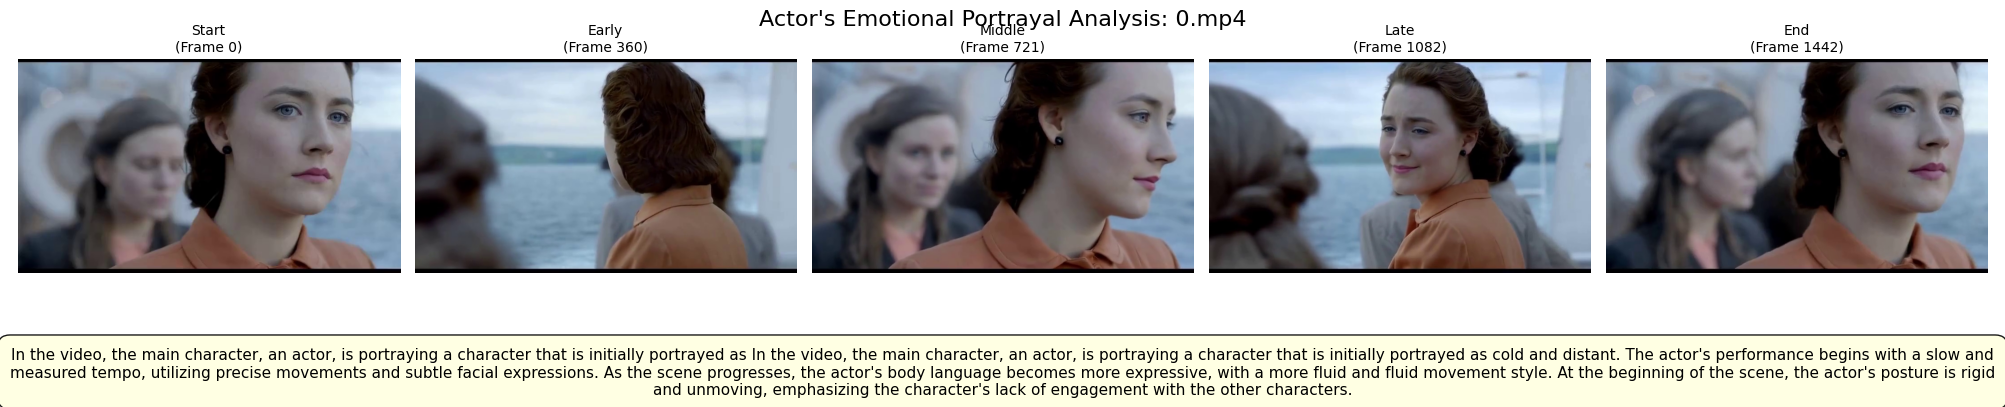


📝 Detailed Emotional Analysis:
In the video, the main character, an actor, is portraying a character that is initially portrayed as In the video, the main character, an actor, is portraying a character that is initially portrayed as cold and distant. The actor's performance begins with a slow and measured tempo, utilizing precise movements and subtle facial expressions. As the scene progresses, the actor's body language becomes more expressive, with a more fluid and fluid movement style. At the beginning of the scene, the actor's posture is rigid and unmoving, emphasizing the character's lack of engagement with the other characters.
💾 Saved: /content/drive/MyDrive/Colab Notebooks/dataVideo/deployment/0.0_emotion.pkl

🔍 Debug: Checking video directory contents...
📁 Video files found: ['52.mp4', '20.mp4', '54.mp4', '19.mp4', '8.mp4', '12.mp4', '63.mp4', '50.mp4', '62.mp4', '21.mp4', '17.mp4', '0.mp4', '28.mp4', '4.mp4', '36.mp4', '44.mp4', '24.mp4', '23.mp4', '10.mp4', '80.mp4', '40.mp4

In [19]:
!pip install --upgrade transformers accelerate torch

from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

# ------------------------------
# Load ultra-fast, low-RAM LLM (TinyLlama) on CPU
# ------------------------------
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    device_map="cpu",  # Force CPU usage
    low_cpu_mem_usage=True
)

model.config.use_cache = False

llm = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=120,  # Increased for longer description
    temperature=0.7,
    do_sample=True,
    pad_token_id=tokenizer.eos_token_id
)

print(f"✅ Fast LLM ready: {model_name} (using CPU)")
print(f"💾 Model size: {model.num_parameters() / 1e6:.1f}M parameters")

# ------------------------------
# Sample frames from different parts of the video
# ------------------------------
def sample_timeline_frames(video_path, n_samples=5):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"❌ Error: Cannot open video {video_path}")
        return [], []

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"📊 Total frames: {total_frames}")

    # Sample frames from beginning, middle, and end to show progression
    frame_indices = [
        0,  # Beginning
        max(1, total_frames // 4),  # First quarter
        total_frames // 2,  # Middle
        (3 * total_frames) // 4,  # Third quarter
        max(1, total_frames - 1)  # End
    ]

    frames = []
    successful_indices = []

    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            successful_indices.append(idx)
            print(f"✅ Captured frame {idx}")
        else:
            print(f"❌ Failed to capture frame {idx}")

    cap.release()
    return frames, successful_indices

# ------------------------------
# NEW: Prompt for detailed paragraph-style description
# ------------------------------
def create_detailed_prompt(sample):
    return f"""<|system|>
You are a film and acting analyst. Write a detailed paragraph (3-4 sentences) describing how the actor portrays emotional changes through body language throughout the scene.

Start with: "In the video, the main character, an actor, is portraying a character that is initially portrayed as..."
</s>
<|user|>
Write a detailed paragraph (3-4 sentences) about the actor's emotional portrayal:

Valence: {sample['valence_mean']:.2f} (negative to positive)
Arousal: {sample['arousal_mean']:.2f} (calm to excited)
Movement: {sample['movement_intensity']:.3f}

Describe the emotional journey from beginning to end, focusing on the actor's performance and body language changes:
</s>
<|assistant|>
In the video, the main character, an actor, is portraying a character that is initially portrayed as"""

# ------------------------------
# Clean up the response to get a proper detailed paragraph
# ------------------------------
def clean_detailed_response(text):
    # Extract text after assistant tag and combine with the beginning
    if "<|assistant|>" in text:
        text = text.split("<|assistant|>")[-1].strip()

    # Ensure it starts with the proper beginning
    full_paragraph = f"In the video, the main character, an actor, is portraying a character that is initially portrayed as {text}"

    # Remove any bullet points or numbering
    full_paragraph = full_paragraph.replace('•', '').replace('-', '').strip()

    # Ensure it's a proper paragraph (remove excessive newlines)
    lines = [line.strip() for line in full_paragraph.split('\n') if line.strip()]
    paragraph = ' '.join(lines)

    # Ensure it has proper sentence structure
    if not paragraph.endswith('.'):
        paragraph += '.'

    # Limit length but ensure completeness
    if len(paragraph) > 350:
        # Try to cut at a sentence boundary
        sentences = paragraph.split('.')
        if len(sentences) > 1:
            paragraph = '.'.join(sentences[:4]) + '.' if len(sentences) >= 4 else paragraph[:350] + '...'
        else:
            paragraph = paragraph[:350] + '...'

    return paragraph

# ------------------------------
# Main execution
# ------------------------------
try:
    # Select sample
    sample = df_summary.iloc[0].copy()

    # FIX: Use the correct video filename (0.mp4 instead of 0.0.mp4)
    video_filename = f"{sample['video_id']}.mp4"
    # If video_id is 0.0 but file is 0.mp4, fix it:
    if str(sample['video_id']) == '0.0':
        video_filename = "0.mp4"

    video_path = f"/content/drive/MyDrive/Colab Notebooks/dataVideo/videos/{video_filename}"

    print(f"📹 Processing video: {video_filename}")
    print(f"🔍 Looking for: {video_path}")

    # Check if file exists
    if not os.path.exists(video_path):
        print(f"❌ File not found: {video_path}")
        # Try alternative paths
        alternative_paths = [
            f"/content/drive/MyDrive/Colab Notebooks/dataVideo/videos/0.mp4",
            f"/content/drive/MyDrive/Colab Notebooks/dataVideo/videos/{sample['video_id']}.mp4"
        ]
        for alt_path in alternative_paths:
            if os.path.exists(alt_path):
                video_path = alt_path
                print(f"✅ Found video at: {video_path}")
                break
        else:
            print("❌ Could not find video file in any expected location")

    # Generate detailed paragraph description
    prompt = create_detailed_prompt(sample)
    result = llm(prompt, max_new_tokens=120)[0]['generated_text']

    # Clean and store the response
    detailed_desc = clean_detailed_response(result)
    sample["emotion_analysis"] = detailed_desc

    print("🎯 Detailed analysis generated")

    # Sample frames from different timeline points
    frames, frame_indices = sample_timeline_frames(video_path, n_samples=5)

    if frames:
        # Create the plot with timeline layout
        fig, axes = plt.subplots(1, len(frames), figsize=(20, 4))

        # If only one frame, make it iterable
        if len(frames) == 1:
            axes = [axes]

        timeline_labels = ["Start", "Early", "Middle", "Late", "End"]

        for i, (frame, ax) in enumerate(zip(frames, axes)):
            ax.imshow(frame)
            ax.axis('off')
            if i < len(timeline_labels):
                ax.set_title(f"{timeline_labels[i]}\n(Frame {frame_indices[i]})", fontsize=10)
            else:
                ax.set_title(f"Frame {frame_indices[i]}", fontsize=10)

        # Add the detailed description as a text box
        plt.figtext(0.5, 0.01, detailed_desc,
                   ha='center', va='bottom', fontsize=11,
                   bbox=dict(boxstyle="round,pad=0.8", facecolor="lightyellow", alpha=0.9),
                   wrap=True)

        plt.suptitle(f"Actor's Emotional Portrayal Analysis: {video_filename}", fontsize=16, y=0.98)
        plt.tight_layout()
        plt.subplots_adjust(bottom=0.30)  # More space for the detailed paragraph
        plt.show()

        # Print the description separately
        print("\n📝 Detailed Emotional Analysis:")
        print(detailed_desc)

    else:
        print("❌ No frames could be loaded from the video")

    # Save results
    output_folder = "/content/drive/MyDrive/Colab Notebooks/dataVideo/deployment"
    os.makedirs(output_folder, exist_ok=True)
    output_file = os.path.join(output_folder, f"{sample['video_id']}_emotion.pkl")

    with open(output_file, "wb") as f:
        pickle.dump(sample, f)

    print(f"💾 Saved: {output_file}")

except Exception as e:
    print(f"❌ Error: {e}")
    import traceback
    traceback.print_exc()

# ------------------------------
# Debug: Check what video files actually exist
# ------------------------------
print("\n🔍 Debug: Checking video directory contents...")
video_dir = "/content/drive/MyDrive/Colab Notebooks/dataVideo/videos"
if os.path.exists(video_dir):
    files = os.listdir(video_dir)
    video_files = [f for f in files if f.endswith('.mp4')]
    print(f"📁 Video files found: {video_files}")
else:
    print(f"❌ Directory not found: {video_dir}")

🎨  Optional: Display One Frame with LLM Emotion Text

# 📚 Multi-frame Emotion Analysis Pipeline – Recap

## Step 1 – Explore Dataset
- Look inside the dataset folders:
  - `videos/` → contains video files (.mp4, .avi, etc.)
  - `rating_averaged/` → contains valence & arousal scores per frame
- Check video properties: resolution, FPS, duration
- Preview rating files (valence/arousal ranges, missing values)

## Step 2 – Match Videos with Ratings
- Use numbers in file names to match each video with its corresponding rating file
- Store matched pairs for processing

## Step 3 – Extract Pose & Emotion Features
- Use MediaPipe Pose to detect 33 body landmarks per frame (x, y, z, visibility)
- Sample frames (every Nth frame) to reduce processing time
- Combine landmarks with valence & arousal from rating files
- Save each video's features as a CSV file

## Step 4 – Combine All Video Features
- Merge all CSVs into a single dataset
- Add video ID to track which frames belong to which video

## Step 5 – Normalize and Label Emotions
- Normalize valence & arousal to 0–1
- Create emotion categories using valence-arousal:
  - High valence + high arousal → "happy/excited"
  - High valence + low arousal → "calm/content"
  - Low valence + high arousal → "angry/fearful"
  - Low valence + low arousal → "sad/tired"

## Step 6 – Summarize Video Behavior
- Calculate average valence, arousal, and movement intensity per video
- This summary is used for emotion description generation

## Step 7 – Generate Natural-language Descriptions
- Use a local LLM (e.g., Mistral-7B-Instruct) to describe emotional state in words
- LLM input includes:
  - Valence & arousal
  - Body movement intensity
- Output: short natural-language descriptions per video or frame

## Step 8 – Multi-frame Emotional Storytelling
- Sample 5 frames per video
- For each frame, show:
  - Pose landmarks
  - Valence & arousal
  - LLM-generated emotional description
- LLM considers temporal trends to describe changes (e.g., "starts tense, relaxes later")

## Step 9 – Full Video Narrative
- Combine frame-level descriptions into one smooth story
- Example:
  *"The person starts tense and alert, gradually becomes calmer, and ends up relaxed and content."*
- Display frames + frame-level descriptions + full narrative